# Required Libraries

In [1]:
import os
import random
from nltk.corpus import stopwords
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Data Pre-processing

In [4]:
df = pd.read_table("raw.tsv")
df.head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_1428\3315681921.py:1: DtypeWarning: Columns (1,2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table("raw.tsv")


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,20-May-12,27.0
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,27-Apr-10,192.0
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,14-Dec-09,17.0
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,3-Nov-15,10.0
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,27-Nov-16,37.0


In [6]:
df.shape

(161297, 7)

In [8]:
unused = ['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount']
df = df.drop(columns=unused)
df.head()

,condition,review
0,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,ADHD,"""My son is halfway through his fourth week of ..."
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
4,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [10]:
pred_conditions =[ 'Depression', 'Pain', 'Acne', 'Anxiety', 'Insomnia', 'Weight Loss', 'ADHD', 'Obesity', 'Emergency Contraception', 'High Blood Pressure', 'Bowel Preparation', 'Migraine', 'Smoking Cessation', 'Urinary Tract Infection', 'Constipation', 'Chronic Pain','Osteoarthritis', 'Muscle Spasm','Opiate Dependence', 'Irritable Bowel Syndrome', 'Allergic Rhinitis', 'Sinusitis', 'GERD', 'Rheumatoid Arthritis', 'Restless Legs Syndrome', 'Cough', 'Hyperhidrosis', 'High Cholesterol', 'Back Pain', 'Bronchitis', 'Hepatitis C', 'Rosacea', 'Schizophrenia', 'Psoriasis', 'Multiple Sclerosis', 'Endometriosis', 'Benign Prostatic Hyperplasia', 'Bacterial Vaginitis', 'Chlamydia Infection', 'Headache', 'Seizures', 'Influenza', 'Atrial Fibrillation', 'Epilepsy', 'Asthma', 'Skin or Soft Tissue Infection', 'Pneumonia', 'Alcohol Dependence', 'Postmenopausal Symptoms', 'Underactive Thyroid', 'Osteoporosis', 'Anesthesia', 'Inflammatory Conditions', 'Opiate Withdrawal', 'Psoriatic Arthritis', 'Menstrual Disorders', 'Ulcerative Colitis', 'Nasal Congestion', 'Polycystic Ovary Syndrome', 'Upper Respiratory Tract Infection', 'Bacterial Skin Infection', 'Otitis Media', 'Urinary Incontinence', 'Eczema', 'Helicobacter Pylori Infection', 'Trigeminal Neuralgia', 'Ovarian Cysts', 'Diverticulitis', 'Keratosis', 'Deep Vein Thrombosis', 'Sciatica', 'Benign Essential Trem', 'COPD', 'Allergies', 'Diarrhea', 'Ankylosing Spondylitis', 'Hypertriglyceridemia', 'Postherpetic Neuralgia', 'Dry Skin', 'Light Sedation', 'Hypersomnia', 'Dysuria', 'Edema', 'Chronic Fatigue Syndrome', 'Alcohol Withdrawal', 'Dry Eye Disease', 'Autism', 'Postoperative Pain', 'Dental Abscess', 'Peripheral Neuropathy', 'Alopecia', 'Cluster Headaches', 'Muscle Pain', 'Dermatitis', 'Allergic Reactions', 'Kidney Infections', 'Rhinitis', 'Human Papilloma Virus', 'Menorrhagia', 'Prostatitis', 'Amenorrhea', 'Urinary Tract Stones', 'Seasonal Allergic Conjunctivitis', 'Basal Cell Carcinoma', 'Erosive Esophagitis', 'Strep Throat', 'Reflex Sympathetic Dystrophy Syndrome', 'Left Ventricular Dysfunction', 'Giardiasis', 'Uterine Fibroids', 'Uveitis', 'Psychosis', 'Supraventricular Tachycardia', 'Indigestion', 'Oral Thrush', 'Hemorrhoids', 'Constipation', 'Vitamin D Deficiency', 'TSH Suppression', 'Heart Attack', 'Nocturnal Leg Cramps', 'Hirsutism', 'Mitral Valve Prolapse', 'Malaria', 'Tinnitus', 'Undifferentiated Connective Tissue Disease', 'Bursitis', 'Pharyngitis', 'Diaper Rash', 'Trichotillomania', 'Gastroenteritis', 'Progesterone Insufficiency', 'Angina', 'Anorexia', 'Warts', 'Opioid Overdose', 'Conjunctivitis', 'Dermatological Disorders', 'Night Terrors', 'Clostridial Infection', 'Dermatomyositis']

In [12]:
df = df[df['condition'].isin(pred_conditions)]

In [14]:
df.tail()

,condition,review
7871,Acne,"""This so far has been the only pill/birth cont..."
7872,Nasal Congestion,"""I get recurrent sinus infections and oral med..."
7873,Depression,"""I had been on Risperdal for about 6 years but..."
7874,Pain,"""Have been taking 6 tabs 5/325 a day for three..."
7876,Insomnia,"""I&#039;ve been on ambient for a year. When I..."


In [16]:
df.dropna(inplace=True)
df.shape

(4234, 2)

In [18]:
df

,condition,review
0,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,ADHD,"""My son is halfway through his fourth week of ..."
4,Opiate Dependence,"""Suboxone has completely turned my life around..."
5,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard..."
6,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t..."
...,...,...
7871,Acne,"""This so far has been the only pill/birth cont..."
7872,Nasal Congestion,"""I get recurrent sinus infections and oral med..."
7873,Depression,"""I had been on Risperdal for about 6 years but..."
7874,Pain,"""Have been taking 6 tabs 5/325 a day for three..."


Removing unnecessary quotes, HTML tags and symbols from all the columns.

In [21]:
df['review'][4]

'"Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."'

In [23]:
for column in df.columns.to_list():
    df[column] = df[column].apply(lambda x: str(x).replace('"', ''))

In [25]:
from bs4 import BeautifulSoup as bs
def removeHtmlTags(review):
    return bs(review, 'html.parser').get_text()

df['review'] = df['review'].apply(removeHtmlTags)

C:\Users\ayush\AppData\Local\Temp\ipykernel_1428\847798648.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return bs(review, 'html.parser').get_text()


In [27]:
import re
df['review'] = df['review'].apply(lambda x: re.sub('[^a-zA-Z]', " ", x))

In [29]:
df['review'][4]

'Suboxone has completely turned my life around   I feel healthier  I m excelling at my job and I always have money in my pocket and my savings account   I had none of those before Suboxone and spent years abusing oxycontin   My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction   All that is history   If you re ready to stop  there s a good chance that suboxone will put you on the path of great life again   I have found the side effects to be minimal compared to oxycontin   I m actually sleeping better    Slight constipation is about it for me   It truly is amazing  The cost pales in comparison to what I spent on oxycontin '

Data Description

In [32]:
value_counts = df['condition'].value_counts().head(10)
value_counts

condition
Depression                 470
Pain                       320
Acne                       283
Anxiety                    272
ADHD                       184
Insomnia                   179
Obesity                    164
Weight Loss                164
Emergency Contraception    137
High Blood Pressure        120
Name: count, dtype: int64

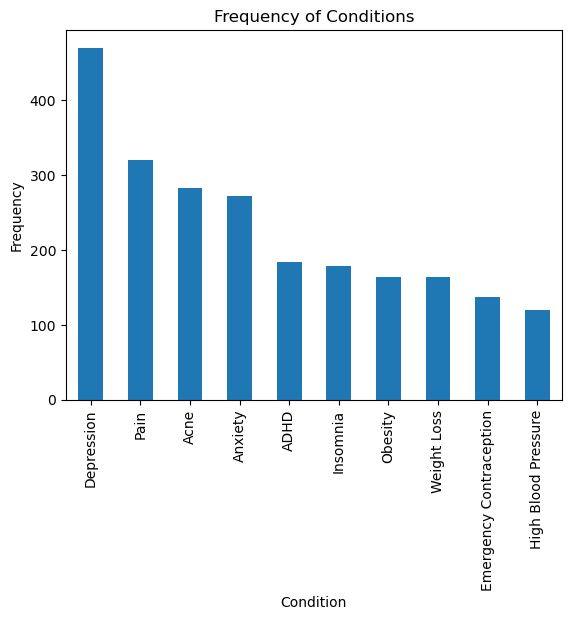

In [34]:
value_counts.plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Conditions')
plt.show()

Removing Stop Words

In [37]:
stop_words = set(stopwords.words('english'))
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
df['cleaned_review'] = df['review'].apply(lambda x : remove_stop(x))
df.head()

,condition,review,cleaned_review
0,Left Ventricular Dysfunction,It has no side effect I take it in combinatio...,It side effect I take combination Bystolic Mg ...
1,ADHD,My son is halfway through his fourth week of I...,My son halfway fourth week Intuniv We became c...
4,Opiate Dependence,Suboxone has completely turned my life around ...,Suboxone completely turned life around I feel ...
5,Benign Prostatic Hyperplasia,nd day on mg started to work with rock hard ...,nd day mg started work rock hard erections how...
6,Emergency Contraception,He pulled out but he cummed a bit in me I to...,He pulled cummed bit I took Plan B hours later...


Removing Puncuation

In [40]:
def remove_punc(text):
    no_punc ="".join([char for char in text if char not in string.punctuation])
    return no_punc
df['cleaned_review'] = df['cleaned_review'].apply(lambda x : remove_punc(x))
df['cleaned_review'][4]

'Suboxone completely turned life around I feel healthier I excelling job I always money pocket savings account I none Suboxone spent years abusing oxycontin My paycheck already spent time I got I started resorting scheming stealing fund addiction All history If ready stop good chance suboxone put path great life I found side effects minimal compared oxycontin I actually sleeping better Slight constipation It truly amazing The cost pales comparison I spent oxycontin'

In [ ]:
! pip install spacy

# Lemmatization

In [43]:
import spacy
nlp = spacy.load('en_core_web_sm')

df = df.reset_index(drop=True)

i=0
list_for_df = []

while i<= 4240:
    doc = nlp(df['cleaned_review'][i])
    print(doc)
    print("\n")
    words=[]
    for word in doc:
        words.append(word)
    lemmatized_2sentence = " ".join([word.lemma_ for word in doc])
    print(i, "------>", (lemmatized_2sentence))
    list_for_df.append(lemmatized_2sentence)
    i = i+1

ModuleNotFoundError: No module named 'spacy'

I medication almost full month I never feel hungry eating WAY less I ever however scale moved Bad heartburn side effect I try one month weight loss I going stop Disappointed I pay pocket


69 ------> I medication almost full month I never feel hungry eat WAY less I ever however scale move bad heartburn side effect I try one month weight loss I go stop disappoint I pay pocket
Depo great relief pain endometriosis I rd shot No period I spot whole month next shot due I hoping stop body gets used The shot painless side effect I noticed minor weight gain sex drive decreased bit I okay least pain gone I got scared reading everyone say drug almost get I glad I took chance see I reacted Everyone different I satisfied


70 ------> depo great relief pain endometriosis I rd shoot no period I spot whole month next shot due I hope stop body gets use the shot painless side effect I notice minor weight gain sex drive decrease bit I okay least pain go I get scared read everyone say drug almost get I gl

Had open heart surgery double mastectomy span years Very painful nerve pain time Bio Freeze Roll On Definitely works pain Unfortunately literally burned chest Don want anyone go Thank Be well everyone


88 ------> have open heart surgery double mastectomy span year very painful nerve pain time Bio Freeze Roll on definitely work pain unfortunately literally burn chest Don want anyone go thank be well everyone
My rheumatologist put Plaquenil UCTD Two days later I started migraines fits crying anxiety attacks irritable depressed feeling almost convulsive When doctor took medicines I slept hours getting dinner going back bed This medicine NOT


89 ------> my rheumatologist put plaquenil UCTD two day later I start migraine fit cry anxiety attack irritable depressed feeling almost convulsive when doctor take medicine I sleep hour get dinner go back bed this medicine not
OMG I SWEAR I M NOT A PAID PERSON I got bad back past I used success spending money I pounds I eat NO JUNK FOOD NO FAST FOO

The migraine medicine ever worked Now insurance company cover Guess I pay It works good


106 ------> the migraine medicine ever work now insurance company cover Guess I pay it work good
Stay away medication The st day used I impressed days later I rebound face burning like hell I waited like days apply see happens I lost sensation lips got swollen Then hours rebound got worse like two weeks skin stopped burning I still understand product approved FDA


107 ------> stay away medication the st day use I impress day later I rebound face burn like hell I wait like day apply see happen I lose sensation lip get swollen then hour rebound get bad like two week skin stop burn I still understand product approve FDA
Dulera works pretty well need use rescue inhaler often one main downside continuously causes sinuitis causes migraine I always bad problems sinuses definately reconsidering continuing using product


108 ------> Dulera work pretty well need use rescue inhaler often one main downside 

This best migraine medication I feel different individual But successful completely aborting migraines time With types I take repeat dose get results needed continue normal day


126 ------> this good migraine medication I feel different individual but successful completely abort migraine time with type I take repeat dose get result need continue normal day
I severe depression since teens antidepressants many years Fortunately I beneficial effects several years The effective treatment date combination Wellbutrin Cymbalta I took combination ten years unfortunately I recently started slipping downward increased depression feeling control I prescribed Fetzima transitioned Cymbalta completed starter pack benefit increased energy My Dr increased doseage mg mg two weeks I never felt lack better word crazy life I irretiable angry depressed unreasonable feeling


127 ------> I severe depression since teen antidepressant many year fortunately I beneficial effect several year the effective treat

I tried samples dr sent home It gave worst stomach aches life And I go bathroom anymore I normally I hated medication made feel much worse


145 ------> I try sample dr send home it give bad stomach ache life and I go bathroom anymore I normally I hate medication make feel much bad
I took Bontril mg months I started lbs I went buy New clothes size depressing I started Bontril mg nothing bumped I stop drinking cold drinks water I even drink tea I ate high protein diet beef jerky cheese yogurt They told calories felt impossible I exercise first month slacked second I lost pounds total months There I gain appetite back got way pounds This medicine absolutely amazing Its years I starting gaining weight back due depo shot I definalty going back Bont


146 ------> I take Bontril mg month I start lbs I go buy new clothe size depress I start Bontril mg nothing bump I stop drink cold drink water I even drink tea I eat high protein diet beef jerky cheese yogurt they tell calorie feel impossible 

This drug phenomenal migraines long catch early


166 ------> this drug phenomenal migraine long catch early
I prescribed headaches eye irritation allergies Been taking month No improvement change symptoms Drs office said takes days help symptoms pharmacist said take weeks build system The generic cheap month change Don know med working mis diagnosis


167 ------> I prescribe headache eye irritation allergy been take month no improvement change symptom Drs office say take day help symptom pharmacist say take week build system the generic cheap month change Don know med work mis diagnosis
years old pounds Severe paranoia stimulants Wellbutrin caffeine well Nowhere else turn I started Straterra mg twice day Effects first hours Felt manic ish Sleep pattern disrupted Cola colored urine stains toilet bowl flushed Smoking desire enhanced weeks later dosage Very focused Used together occasionally anti psychotic anti anxiety panic attacks manicness paranoia begins occur Studying time increased

I bad one point anxieyy depression OCD working together horrible disgusting thoughts OCD driving constant panic attacks anxiety roof Which drove stay doors avoid triggers pushed deep deep depression I zoloft months low dose mg I feel much better I able go get job I excelling got three raises months I felt bit anxiety ocd poking I may need raise dose med changed life far rut give regain life back


183 ------> I bad one point anxieyy depression OCD work together horrible disgusting thought ocd drive constant panic attack anxiety roof which drive stay door avoid trigger push deep deep depression I zoloft month low dose mg I feel much well I able go get job I excel get three raise month I feel bit anxiety ocd poke I may need raise dose med change life far rut give regain life back
I allergic antibiotics including Amoxicillin Erythromycin Upon reaching th month pregnancy family came bronchitis unfortunately I caught well doctors prescribed Z Pack within hours I felt tremendously better say

I taken medicine years Gained lots weight Weight Watchers Diet lost lbs far Very happy At mg bad restless legs reduced mg sleep great hours Had intolerable insomnia entire life Wonder would happen reduced mg Also added mg Prozac daytime energy works great


201 ------> I take medicine year gain lot weight Weight Watchers Diet lose lbs far very happy at mg bad restless leg reduce mg sleep great hour have intolerable insomnia entire life Wonder would happen reduce mg also add mg Prozac daytime energy work great
Binders made lactate good stomach dark blue pill work best


202 ------> binder make lactate good stomach dark blue pill work well
I also knee pain shoulder pain elbow hand finger pain Norco seems work best knee pain


203 ------> I also knee pain shoulder pain elbow hand finger pain Norco seem work good knee pain
I received first Lupron shot couple weeks ago In past two weeks I noticed pain bad often shot The side mood swings hot flashes I thought I weeks I started experiencing s

I took antibiotic second time I UTI I quantity pills I meant take course days would prescribe pills So th pill UTI symptoms never stopped So I took th pill Immediately I broke hives rashes body I stopped taking antibiotic The rash violent itchy I go emergency room gave IV saline benadryl steriods help allergic reaction many people allergic reactions antibiotic As wanted overdose So please I beg research antibiotic It could life threatening


224 ------> I take antibiotic second time I UTI I quantity pill I mean take course day would prescribe pill so th pill UTI symptom never stop so I take th pill immediately I break hive rashe body I stop take antibiotic the rash violent itchy I go emergency room give IV saline benadryl steriod help allergic reaction many people allergic reaction antibiotic as want overdose so please I beg research antibiotic it could life threaten
I medication month I experience one side effect SO MUCH better shots We see later effective say


225 ------> I medicati

My stepson years old mg dosage Abilify years We discovered saw commercial study involving autistic children aggressive tendencies Since behavior improved home school The side effect mentioned others weight gain To I say take active role kid diet force exercise This offset side effects still reaping benefits


244 ------> my stepson year old mg dosage Abilify year we discover see commercial study involve autistic child aggressive tendency since behavior improve home school the side effect mention other weight gain to I say take active role kid diet force exercise this offset side effect still reap benefit
DRINK LOTS OF WATER I go every morning like clock work But due surgery I take pain killers I able go days My friend takes regularly due celiac disease causes lot stomach issues brought pack use told water key true After I took one I read reviews freaked You need one I took pill pm two bottles ml water At I started feel little cramp light body ache I bowel movement Then another one mins

I always read reviews I always paranoid every time I take plan b I taken probably much good reason I well birth control pills always relationship Since pill effective I weigh recommended weight sex fertile days While I medical professional I take lot vitamin c parsley get period early ease stress It works relax


264 ------> I always read review I always paranoid every time I take plan b I take probably much good reason I well birth control pill always relationship since pill effective I weigh recommend weight sex fertile day while I medical professional I take lot vitamin c parsley get period early ease stress it work relax
I pill days gained Lbs Breast tenderness low libido apathy irritability aggression exhaustion clumsiness I try month hope side effects go away


265 ------> I pill day gain Lbs Breast tenderness low libido apathy irritability aggression exhaustion clumsiness I try month hope side effect go away
I used pill twice My boyfriend havjng unprotected sex yrs We usually us

I years I struggled weight It super serious I got relationship I gained nearly kg year At heaviest I kg I see personal trainer go Zumba I thought I eating well nothing helped shed weight I got tested thyroid issues PCOS neither explained inability shed Kgs I started drug days ago My starting weight kg I weigh kg It completely changed I view food I crave made realise whilst foods I previously eating good foods I eating far much body forgotten recognise true hunger I excited worth money


285 ------> I year I struggle weight it super serious I get relationship I gain nearly kg year at heavy I kg I see personal trainer go Zumba I think I eat well nothing help shed weight I got test thyroid issue PCOS neither explain inability shed Kgs I start drug day ago my starting weight kg I weigh kg it completely change I view food I crave make realise whilst food I previously eat good food I eat far much body forget recognise true hunger I excite worth money
Ladies please smart use BC condoms Plan B

Helped ton post partum Suffered depression long babies born Insomnia common I took sleep aids first year Any tiny disturbance taking NOT RECOMMENDED Worst I ever felt The brain zaps like special kind torture appetite simply non existent good someone already weight It saved long time choice come heavily weighed withdrawal symptoms I suffering week later Anxiety getting better physically much change


304 ------> help ton post partum suffer depression long baby bear Insomnia common I take sleep aid first year any tiny disturbance take not RECOMMENDED bad I ever feel the brain zap like special kind torture appetite simply non existent good someone already weight it save long time choice come heavily weigh withdrawal symptom I suffer week later anxiety get well physically much change
Not twice woke separate procedures colonoscopies doctors trying force air Drug way mild


305 ------> not twice wake separate procedure colonoscopy doctor try force air Drug way mild
I Lexapro Celexa Citolopra

Being I rheumatoid arthritis take medication finding antibiotics treat infection easy I many side effects medicine I took doctor prescribed I upset stomach though first Any infection I showed definite improvement within first hrs


324 ------> be I rheumatoid arthritis take medication finding antibiotic treat infection easy I many side effect medicine I take doctor prescribe I upset stomach though first any infection I show definite improvement within first hrs
It bad doctor freaked addictive behavior point willing let people suffer Valium low dose works junk It may work even results using test rats I seen state low results I resent person really needs help acute conditions given kind low performing medication


325 ------> it bad doctor freak addictive behavior point willing let people suffer Valium low dose work junk it may work even result use test rat I see state low result I resent person really need help acute condition give kind low perform medication
After years Prostate Proble

I medication months taking mg day When I started low dose first weeks I experienced severe dry skin lips especially nose eyes even The first weeks skin broke worse And beginning I started getting severe back pain Now week skin settled tiny bit better blackheads disappeared My skin still drier usual actually improved lips fine long I apply vaseline times day The significant side effect I still back bone joint pain So far I happy I achieved blackheads expect things keep improving


343 ------> I medication month take mg day when I start low dose first week I experience severe dry skin lip especially nose eye even the first week skin break worse and begin I start get severe back pain now week skin settle tiny bit well blackhead disappear my skin still drier usual actually improve lip fine long I apply vaseline time day the significant side effect I still back bone joint pain so far I happy I achieve blackhead expect thing keep improve
A friend told told cut sheets quarters So I I forgot m

This nd time I pill first time I lost lbs Well I started I lost lbs I tend lose lbs week past workouts time I going start gym week I weigh I stand goal weight The first nights I could sleep I sleeping like baby feeling refreshed morning I take pill soon I wake


361 ------> this nd time I pill first time I lose lbs well I start I lose lbs I tend lose lbs week past workouts time I go start gym week I weigh I stand goal weight the first night I could sleep I sleep like baby feeling refresh morning I take pill soon I wake
I found medicine clear eczema temporarily However I find I lot burning sensations around face specifically eyes feel warm I using


362 ------> I find medicine clear eczema temporarily however I find I lot burn sensation around face specifically eye feel warm I use
Worked quickly head lots yawning week drowsy morning minute drive work started taking I got work better society general Sometimes restless sleep Having said I lot negative thoughts life I notice dwell I really

Been Tramadol minor headaches issues Iliotibial band syndrome arthritis Basically since controlled lot harder obtain doctor also considered new painkiller ER doctor office unless broken bone In honesty helps leg lets focus work I tried norco vicodin es also lyrica gabapentin I fan I dislike nausea feeling grogginess But time everyone different people stand medication people cannot I would recommend less major pain nt need time


382 ------> be tramadol minor headache issue Iliotibial band syndrome arthritis basically since control lot hard obtain doctor also consider new painkill ER doctor office unless broken bone in honesty help leg let focus work I try norco vicodin es also lyrica gabapentin I fan I dislike nausea feel grogginess but time everyone different people stand medication people can not I would recommend less major pain not need time
I started using cream months ago moderate acne I started using everyday I washed face I went bed For first months face became dry red irritate

The Nilstat cleared white spots mouth within days throat less sore I could start eating solid food first time since radiation treatment weeks On third bottle fully cleared thrush throat I Chemo radiation heaps antibiotics I hard case


403 ------> the Nilstat clear white spot mouth within day throat less sore I could start eat solid food first time since radiation treatment week on third bottle fully clear thrush throat I Chemo radiation heap antibiotic I hard case
Caused things remember afterwards I would cautious first taking medication


404 ------> cause thing remember afterwards I would cautious first take medication
I never upset embarrassed outbursts anger The day I screaming daughter water park well poor son airport I believe aggressive behavior I getting


405 ------> I never upset embarrassed outburst anger the day I scream daughter water park well poor son airport I believe aggressive behavior I get
Well I using mg per day together Rexetin Paroxetine Fluonxol sometimes Xanax

I week side affects I watch I eat stay away carbs sugars I getting married June trying loose weight since last summer following SOS diet strictly going gym times week much change So far I lbs week one I hopeful first time long time


422 ------> I week side affect I watch I eat stay away carbs sugar I getting marry June try loose weight since last summer follow SOS diet strictly go gym time week much change so far I lbs week one I hopeful first time long time
Plan B one step LIFESAVER My boyfriend I un protective sex So within hours incident I took pill I paranoid hell sure whether pill would work first time taking I also young I experienced mild cramping head aches nausea five days But period came time The key stay calm let pill job


423 ------> plan B one step LIFESAVER my boyfriend I un protective sex so within hour incident I take pill I paranoid hell sure whether pill would work first time take I also young I experience mild cramp head ache nausea five day but period come time th

441 ------> take year I need insurance will not pay medicine month want Crestor we
I bad experience time I tried I Ambien many years Dr wanted try something else The Rozerem made extremely anxious opposite I needed My heart beat fast I feeling nervousness anxiousness I tried times Maybe I allergic


442 ------> I bad experience time I try I Ambien many year Dr want try something else the Rozerem make extremely anxious opposite I need my heart beat fast I feel nervousness anxiousness I try time maybe I allergic
I medication couple days heal stomach lining scratched acid reflux esophagogastroduodenoscopy EDG done This medication heal stomach made heals well protects ever coming back I told doctor The thing I noticed far medication give dry mouth dry throat always best keep mouth clean ice water helps lot The thing go Walmart buy BIOTENE dry mouth moisturizing spray works excellent After brushing rinsing mouth also use lip moisturizer irritate lips also finding drink lots Water Yo


443 -

My year old son severe ADHD ODD anxiety We started Vyvanse mg Depakote twice day Kapvay evening last week We worried talked SO much like speed ran around house looking paper books pens write never sat still pleasant started Vyvanse However Always saying I sorry blurting please thank unheard starting Vyvanse We noticing around Vyvanse wearing aggression whining came back vengeance We added another mg Kapvay school Depakote result AMAZING He pleasant ALL day long


463 ------> my year old son severe ADHD odd anxiety we start Vyvanse mg Depakote twice day Kapvay evening last week we worry talk so much like speed run around house look paper book pen write never sit still pleasant start Vyvanse however always say I sorry blurting please thank unheard start Vyvanse we notice around Vyvanse wear aggression whine come back vengeance we add another mg Kapvay school Depakote result AMAZING he pleasant all day long
This takes least week kick rely tablets Make sure drink lots water good food I not

I unprotected sex two days period I took plan b one step less hours later low behold work I even got symptoms pill week later I bleeding like period days And took home pregnancy tests lightly came back positive I called plan b number box reported experience They took information pull number box Let tell people please use condom I found yesterday I pregnant I Now mess Please safe rely partner safe I thought obvious needed pull Sorry graphic honest I dont think plan b even works


484 ------> I unprotecte sex two day period I take plan b one step less hour later low behold work I even get symptom pill week later I bleed like period day and take home pregnancy test lightly come back positive I call plan b number box report experience they take information pull number box Let tell people please use condom I find yesterday I pregnant I now mess please safe rely partner safe I think obvious need pull sorry graphic honest I do not think plan b even work
I developed eczema I turned I started d

I currently started taking Keppra last week half I experienced numbness tingling throughout whole body along feels like electrical impulse shocks I tired time trouble sleeping I hope side effects cease side effects making feel really bad way I Dilantin I taking


506 ------> I currently start take Keppra last week half I experience numbness tingling throughout whole body along feel like electrical impulse shock I tire time trouble sleep I hope side effect cease side effect make feel really bad way I Dilantin I take
I started taking medication years ago My doctor told non narcotic non habit forming Up time I never addictions drugs alcohol unfortunately I dependent drug sleep It however work well side effects I wake feeling refreshed


507 ------> I start take medication year ago my doctor tell non narcotic non habit form up time I never addiction drug alcohol unfortunately I dependent drug sleep it however work well side effect I wake feeling refresh
Hello I started psoriasis I I covere

Expensive works No negative side effects


525 ------> expensive work no negative side effect
The suggestion chill Suprep fridge chill water soda gatorade great advice Yes use straw I put Lifesavor Peppermint mouth prepare Suprep nasty taste I added cold water ginger ale fill line cup provided Using straw holding nose I quickly drank Supra peppermint Lifesaver gums cheek sip I able get nasty taste mouth mint Having lifesaver peppermint REALLY helps aftertaste It rd colonoscopy time I actually able get without gagging stuff Yes like metallic grape drink


526 ------> the suggestion chill suprep fridge chill water soda gatorade great advice yes use straw I put Lifesavor Peppermint mouth prepare Suprep nasty taste I add cold water ginger ale fill line cup provide use straw hold nose I quickly drink Supra peppermint Lifesaver gum cheek sip I able get nasty taste mouth mint have lifesaver peppermint REALLY help aftertaste it rd colonoscopy time I actually able get without gag stuff yes like

On rd week improvement increased pain swelling FEVER exponentially increased core temp hot joints decreased energy frequent headache increased depression I know things could get worse already But Hanging mine every single joint unrelenting I really flares cuz mine constant daily nightly pain swelling fever


545 ------> on rd week improvement increase pain swell FEVER exponentially increase core temp hot joint decrease energy frequent headache increase depression I know thing could get bad already but hang mine every single joint unrelenting I really flare cuz mine constant daily nightly pain swell fever
I suffered severe pain years following motorcycle accident During time I tried every sort pain relief available mainly narcotic drugs I found bad pain Earlier year I prescribed Lyrica far pain relief goes fantastic After months x mg cap per day I experienced total confusion unable perform daily tasks work home I becoming agitated experienced suicidal thoughts Things returned normal wee

563 ------> second day sick I diagnose rapid test strep put medication after day worsen symptom I start cough blood diagnose pneumonia take put levofloxacin day later lung bleeding pneumonia almost go would recommend nothing allow something I catch early worsen I catch late
I paliperidone year The side effects I I get alot nightmares bad dreams I never I alot rocking backwards forwards every time I sit really upsetting annoying I alot restlessness I find difficult settle things In terms sleep medication good I energy least I tried medications side effects well I medication reduced eventually antipsychotic drugs I sick side effects Clozapine made sick time sleepy Another medication I I blurred vision Sick side effects I rather take risk relapse


564 ------> I paliperidone year the side effect I I get alot nightmare bad dream I never I alot rock backwards forward every time I sit really upsetting annoying I alot restlessness I find difficult settle thing in term sleep medication good I 

It definitely makes go omg nausea awful I throw I even talk move bed I concentrate hard throw u The stomach pain really awful Comparison like stomach flu I taking laxatives years never I felt Especially reading reviews I know I one Too intense Like damn I wanted BM get flu geez


586 ------> it definitely make go omg nausea awful I throw I even talk move bed I concentrate hard throw u the stomach pain really awful Comparison like stomach flu I take laxative year never I feel especially read review I know I one too intense like damn I want BM get flu geez
This drug takes long time get fully system It work day week I medication It worked pretty well anxiety well depression My nutritionist Doctor agreed medication caused gain pounds way help depression I keep food journal keep track activity level The overall panic subsided night trying fall asleep I would occasionally chest pain rapid heartbeat trouble breathing You try find ways around medicines cope


587 ------> this drug take long ti

This exceptional medicine I couple weeks I tried Seroquel trazodone Ambien none worked alprazolam miracle medicine


604 ------> this exceptional medicine I couple week I try Seroquel trazodone Ambien none work alprazolam miracle medicine
This rd month doxycycline face shown great improvements I oily skin I moderately severe acne cysts papules pustules At one point hurt annoyed much plus lowered self esteem I decided meet dermatologist She prescribed mg doxycycline along benzoyl peroxide taken daily During first month horrible My face broke terribly I guess part clearing disgusting stuff inside face In second month skin start clear I say I acne free occasional small zits period nothing hurt much The point give


605 ------> this rd month doxycycline face show great improvement I oily skin I moderately severe acne cyst papule pustule at one point hurt annoy much plus lower self esteem I decide meet dermatologist she prescribe mg doxycycline along benzoyl peroxide take daily during first

622 ------> I start Saxenda June I lose lbs since I start I also combine Ketogenic diet the first month I feel nauseous appetite it make dizzy eating so I force eat high fat low carb food man help it amazing avocado day I try incorporate regular portion control diet life it lot hard think limit carb month I lbs lose goal weight I start lbs Size I weigh size I point I fearful go stop work I hope see one thing insurance work pay medication
Low back pain leg pain


623 ------> low back pain leg pain
Battled bacterial vaginitis years I found Tindamax It worked wonders first round pills days I got year later time side effects kicked big time My fingers sore severe muscle aches red inflamed spots chest fever headaches It lasted whole day bacterial vaginitis gone since gave yeast infection


624 ------> battle bacterial vaginitis year I find Tindamax it work wonder first round pill day I get year later time side effect kick big time my finger sore severe muscle ache red inflame spot chest fev

I pins needles hands pinched nerve neck Muscle relaxers stretching new pillow heat nothing working This works really well


642 ------> I pin needle hand pinch nerve neck Muscle relaxer stretch new pillow heat nothing work this work really well
I suffered depression years I take Cymbalta chronic pain still fallen deep depression My doctor added Pristiq day I feeling much better


643 ------> I suffer depression year I take Cymbalta chronic pain still fall deep depression my doctor add Pristiq day I feel much well
I realized child started taking Vyvanse grades improved dramatically She able concentrate pay attention going instead confused This medication working great dosage It scary first however turned great decision


644 ------> I realize child start take Vyvanse grade improve dramatically she able concentrate pay attention go instead confuse this medication work great dosage it scary first however turn great decision
My husband secondary progressive MS using Ampyra month He see cha

I love Celexa I getting depressed long hours med school studying feeling like I time enjoyment Celexa took weeks work worked continues work I longer feel depressed every day Sometimes I sink depression I able snap much quicker I feel less moody boyfriend noticed improvement mood The side effect I experience decreased sex drive harder time climaxing I would prefer going deep end I continue take consider weening life less stressful Great medicine save life


661 ------> I love Celexa I get depressed long hour med school study feeling like I time enjoyment Celexa take week work work continue work I long feel depressed every day sometimes I sink depression I able snap much quick I feel less moody boyfriend notice improvement mood the side effect I experience decrease sex drive hard time climax I would prefer go deep end I continue take consider weene life less stressful great medicine save life
I new medicine I several muscle relaxers never thing After reading everyone else said muscle rel

I severe testicular pain first doctor prescribed meloxicam helped made sick put Vimovo help I night vomiting I told I needed something better At first reluctant give Vicodin Percocet He later prescribed Percocet man stuff really works makes feel like pain anxiety depression miracle You must stop pain goes please take directed doctor become addicting A downsides tiredness nausea sometimes want talk LOT


683 ------> I severe testicular pain first doctor prescribe meloxicam helped make sick put Vimovo help I night vomit I tell I need something well at first reluctant give Vicodin Percocet he later prescribe Percocet man stuff really work make feel like pain anxiety depression miracle you must stop pain go please take directed doctor become addict a downside tiredness nausea sometimes want talk LOT
I switched yaz alesse I heard better acne It wonders skin day period nice However I notice I emotional crazy mood swings I found crying reason good relationship either I gain weight side effect

great drug side effects especially adults


706 ------> great drug side effect especially adult
My year son ADHD combined ODD Focalin XR far medication works son inattentiveness However mg moody glassy eyed Found later overmedicated What I like Focalin became quiet almost Zombie like Also medication last system long enough He stopped takes Focalin XR year Vyvanse mg I considering putting back Focalin lower dose


707 ------> my year son ADHD combine ODD Focalin XR far medication work son inattentiveness However mg moody glassy eye Found later overmedicate what I like Focalin become quiet almost Zombie like also medication last system long enough he stop take Focalin XR year Vyvanse mg I consider put back Focalin lower dose
Made sick stomach dizzy felt made kidneys hurt


708 ------> make sick stomach dizzy feel make kidney hurt
I got medicine September face got bad cleared kept going cycle clear get better It mid December I cleared weeks I also back shoulder chest acne It nothing I goi

Hyped like crazy Made anxiety worse No depression help Gives lots energy


730 ------> hype like crazy make anxiety bad no depression help give lot energy
Well great bad Been using medicine two months This product worked great It cleared sinuses got rid allergies opened tubes eardrum throat could drain But two months I started getting joint pains shoulder pains bad neck joints It got bad last week I went Doctor X rays done mild wear tear Then I got looking reviews lot joints pains mild aggression moody Well summed never trouble Flonase


731 ------> well great bad be use medicine two month this product work great it clear sinus got rid allergy open tube eardrum throat could drain but two month I start get joint pain shoulder pain bad neck joint it get bad last week I go Doctor X ray do mild wear tear then I get look review lot joint pain mild aggression moody well sum never trouble flonase
I Have Struggled adhd yrs finally doc something However I sleeping problems first weeks expected 

I took Diovan two months reduce blood pressure It appears working apparent side effects COST It available generic even good prescription benefit costing month


751 ------> I take Diovan two month reduce blood pressure it appear work apparent side effect cost it available generic even good prescription benefit cost month
I day symptoms subsiding No side effects far


752 ------> I day symptom subside no side effect far
I started Saxenda weighing lbs weeks later I lbs gone I lost first like weeks lost lbs week good I try stay within calorie daily intake I gone amount couple times Side effects minimal mostly heartburn especially I eat late I eat late easy fix I pay per box insurance Saxenda coupon would recommend anyone struggling lose weight


753 ------> I start Saxenda weigh lbs week later I lbs go I lose first like week lose lbs week good I try stay within calorie daily intake I go amount couple time side effect minimal mostly heartburn especially I eat late I eat late easy fix I pay

OK DONT FREAK OUT Bc reading reviews probably freaking hoping way stupid decision made unprotected sex OR begging god mercy bc condom broke Well stuff works I protected sex ended condom snapped OH NO I fertile I little already next morning I drove Walmart bought Took asap exactly days later I GOT MY PERIOD A week early thank thank


770 ------> ok dont freak out Bc reading review probably freak hope way stupid decision make unprotected sex or beg god mercy bc condom break well stuff work I protect sex end condom snap oh no I fertile I little already next morning I drive Walmart buy Took asap exactly day later I got MY period a week early thank thank
On Ampyra year real benefit


771 ------> on Ampyra year real benefit
I gabapentin several yrs originally back pain I L disc fused years later spinal cord stimulator put surgeries later NO RELIEF AT ALL I MG x day But recently neurologyst decided I actually take MG x day I suffering migraines since age The thing I noticed memory I drive thr

791 ------> year old I experience acne since chest face neck extend entire back begin third month Claravis I ENTIRELY cure acne I long pimple I wear makeup anymore it incredible Side effect chap lip first month fatigue
I Belviq years I initially started taking lose weight wedding last year From time I began taking Belviq August I started feeling results although slow within month I several fittings big day seamstress keep taking dress I lost lbs months I amazed So two months wedding anniversary I currently lbs I started last time I weighed I I gone size size I would still like lose another lbs I doubt I get Belviq


792 ------> I belviq year I initially start take lose weight wedding last year from time I begin take Belviq August I start feel result although slow within month I several fitting big day seamstress keep take dress I lose lbs month I amaze so two month wedding anniversary I currently lbs I start last time I weigh I I go size size I would still like lose another lbs I doubt

year old suffering swollen prostate medicine worked good stop taking back pain spread legs


812 ------> year old suffering swollen prostate medicine work good stop take back pain spread leg
Psoriasis since tried everything Humira great changed life better major issues If anything made lose weight It lasted like almost years Obviously like treatments


813 ------> psoriasis since try everything Humira great changed life well major issue if anything make lose weight it last like almost year obviously like treatment
I prescribed Linzess Irritable Bowel Syndrome constipation comes After taking daily week good results I got bad diarrhea My doctor told take needed instead every day I feel lot better I taking every day My gripes diarrhea I careful specific time day I take morning least minutes first meal kind pain busy working person It also pretty expensive gives another reason glad I longer taking every day Besides huge relief finally regular bowel movements strain pass


814 ------> I pre

Had gallbladder removed gave morphine really help much I ended bile leak due complications put dilaudid every ounce pain vanished seconds put iv It made really sleepy nauseous Very addictive works amazing relieve extreme pain


835 ------> have gallbladder remove give morphine really help much I end bile leak due complication put dilaudid every ounce pain vanish second put iv it make really sleepy nauseous very addictive work amazing relieve extreme pain
This first ADD medication I tried In May started mg x bed worked way mg month Initially I horrible headaches PM Dr told take AM made disappear I started new research job June Strattera worked WONDERS helping multitask I moved floor floor That said I felt like I lost creativity became difficult hold conversation new coworkers friends I feel I stopped meds Aug form better relationships I adjusted new place I started mg today mistake Dizziness chills racing heart It feels like taking Sudafed Do start medication suddenly


836 ------> this

It wears quick


854 ------> it wear quick
I think dosage low given


855 ------> I think dosage low give
Five years ago I close suicidal pain found superb pain management doctor Beth Israel Pain Palliative Care Unit NYC I HIGHLY recommend Recently I began feel pain acute variety always chronic pain Said husband drug working Went today regular two month check told doctor He nodded told MANY patients longer get relief Oxycontin new formula meant keep abusers crushing work well ER form I use dose years relative comfort given disability I try higher dosage change medication


856 ------> five year ago I close suicidal pain find superb pain management doctor Beth Israel Pain Palliative Care Unit NYC I HIGHLY recommend recently I begin feel pain acute variety always chronic pain Said husband drug working go today regular two month check tell doctor he nod tell many patient long get relief Oxycontin new formula mean keep abuser crush work well ER form I use dose year relative comfort give di

My child Abilify noticed changes really He still aggression self injurious behavior extreme levels impulsivity I take public randomly hits people especially small children If prevented harming others starts hurts restrain He callouses wrists biting hitting mouth repeatedly The doctor already increased Abilify mg twice day Clonidine mg x day Concerta mg day Ritalin mg day Vistarel mg night melatonin night It like nothing though I terrified take might make worse I lost


876 ------> my child Abilify notice change really he still aggression self injurious behavior extreme level impulsivity I take public randomly hit people especially small child if prevent harm other start hurt restrain he callous wrist bite hit mouth repeatedly the doctor already increase Abilify mg twice day Clonidine mg x day Concerta mg day Ritalin mg day Vistarel mg night melatonin night it like nothing though I terrify take might make bad I lose
I maintenance dose mg times day along different Xanax I panic attack I 

I began sertraline mg approximately four weeks ago I u sure weather take night morning I experimented I found day I would become lethargic yawn constantly little energy would wake middle night stimulated regardless time I took This frustrated I always good sleep schedule active person day I read others experienced similar side effects effects eventually ceased I felt better several days u downcast brooding heavy After three weeks taking effect seemed even I found struggling feelings hopelessness doubt I felt better certainly still struggling u I expect pill u Ccure u D negative thoughts I know I control thoughts feeling heaviness tends settle upon u like dark cloud When I went back doctor follow increased mg I said let u try mg first He agreed Within couple weeks taking mg I still yawned lot I u trouble lethargy sleep issues much My attitude much better For example I found I really funny silly person I forgot I funny depression I u realize serious I become reclusive I also found creati

Always lbs since high school No appetite always ate small portions Taken medication st time I took I gained weigh also gained esophagus spasms gorging I permanently side effect yay I started taking Feb weighed lbs today March I weighing I taken days see I keep appetite use needed It great weight gain side effects Mine include period sex drive severe cold night sweats hot flashes esophagus spasms swelling arms legs active These pros may consider cons constantly hyper


923 ------> always lbs since high school no appetite always eat small portion take medication st time I take I gain weigh also gain esophagus spasm gorging I permanently side effect yay I start take Feb weigh lbs today March I weigh I take day see I keep appetite use need it great weight gain side effect mine include period sex drive severe cold night sweat hot flash esophagus spasm swell arm leg active these pro may consider con constantly hyper
Significant weight gain experienced within months VERY tough libido Extremel

I Shingles March given two meds one antiviral pain The pain pill gave mix meds I went without pain med Then beginning April pain came It got worse worse April May June July ever increasing pain around shingles area Went family doctor Jul prescribed Doloxtine mg Well I read pill first I read wanted avoid ALL Side affects So I continued without pill took tramadol local ointment The pain constant intense Aug back family Doc She insisted I try Doloxtine days later almost pain Yesterday increased mg So far good I stubborn


947 ------> I Shingles March give two med one antiviral pain the pain pill give mix med I go without pain med then begin April pain come it get worse bad April May June July ever increase pain around shingle area go family doctor Jul prescribe Doloxtine mg well I read pill first I read want avoid all side affect so I continue without pill take tramadol local ointment the pain constant intense Aug back family Doc she insist I try Doloxtine day later almost pain yesterday 

I soft erections losing erection well Benign Prostatic Hyperplasia Asked doc medical options prescribed mg Cialis daily needed approx hour sex Have started WOW medicine really worked Easily aroused strong long lasting erections I used hard lasting long little trouble ejaculating I like The one side effect pain back side Eli Lilly offers coupon free day supply great country


970 ------> I soft erection lose erection well Benign Prostatic Hyperplasia ask doc medical option prescribe mg Cialis daily need approx hour sex have start WOW medicine really work easily arouse strong long lasting erection I use hard last long little trouble ejaculate I like the one side effect pain back side Eli Lilly offer coupon free day supply great country
Overall I good luck I went treat acne For first weeks skin face back got SO bad Everything inflamed point sitting leaning something painful Also first month hormones whack trying adjust I intense mood swings I annoyed easily irritated everything patience c

Just taking pills around two hours ago half hour taking I started feeling really sick worst cramps stomach I went asleep hour help still feeling extremely sick crampy The doctor never warned side affects sounds like pretty common No sex going


996 ------> just take pill around two hour ago half hour take I start feel really sick bad cramp stomach I go asleep hour help still feel extremely sick crampy the doctor never warn side affect sound like pretty common no sex go
Well sure everyone follows take ADHD types girlfriend pretty much says traits focused type T Worrier resistant change hyper focused impulsive forgetful etc Doctor originally thought GAD treated Effexor Cipralex Imipramine Cymbalta Cymbalta made things worse Psychiatrist caught ADHD prescribed Wellbutrin HUGE difference I see friends see psych really pleased change turn around May everyone give several weeks try Oh pluses impact libido maybe even increased bit appetite suppression hey two side effects could live


997 ---

No side effects Relief symptoms depression evident first week taking medication continuing The medication expensive month supply small price pay delivers


1024 ------> no side effect Relief symptom depression evident first week take medication continue the medication expensive month supply small price pay deliver
This medicine work well clear infection I taken minimal side effects times like recent I lot side effects dizzy insomnia nerve pain I stop taking really bad antibiotic gets rid sinus infection faster


1025 ------> this medicine work well clear infection I take minimal side effect time like recent I lot side effect dizzy insomnia nerve pain I stop take really bad antibiotic get rid sinus infection fast
It ONLY reason I able sit computer type right weeks ago I got bad virus dehydrated st migraine years old I even begin tell pain I felt past weeks letting AT ALL I blood work spinal tap ct scan mri numerous pain meds I hospital different times past weeks My doctor office gave sh

Has god send without medicine way I would still family I control thoughts actions like never My depression manifested anger longer I become angry reason I control depression


1051 ------> have god send without medicine way I would still family I control thought action like never my depression manifest anger long I become angry reason I control depression
Vomiting pain weakness Unable stand Had cancel colonoscopy HORRIBLE


1052 ------> vomit pain weakness unable stand have cancel colonoscopy horrible
On third day Levaquin Only problem I insomnia Tired day completely awake night Cough pretty much gone I feel great need go bed


1053 ------> on third day Levaquin only problem I insomnia tired day completely awake night Cough pretty much go I feel great need go bed
I Humira maybe months It amazing psoriasis disappearing eyes A couple months I began become unstable standing I used handrails kids crutch Eventually enough I needed husband soon Cain I teach walk physical therapy took minutes

1077 ------> I give Diazapan today take tonight first time all I say thank doctor I feel anxiety melt away I feel like cry I take feeling anymore make physically ill eat sleep stomach constantly go after take tablet I feel normal I could eat for first time month I panic
Used periodically meds giving relief Makes breathing problems clear relieves allergic sinus congestion skin allergy issues dissipate


1078 ------> use periodically med give relief make breathing problem clear relieve allergic sinus congestion skin allergy issue dissipate
I taking Lomotil I surgery Then bone infection set I take IV antibiotics caused extensive diarrhea The first day I took Lomotil worked great hours following days decreased effectiveness By third day longer working I attribute antibiotics I let doctor know possibly prescribe another anti diarrhea medicine change antibiotic


1079 ------> I take Lomotil I surgery then bone infection set I take IV antibiotic cause extensive diarrhea the first day I take L

1105 ------> not good week since injection knee worse hardly walk morning I swell pain gradually get bad injection Waiting hope delay relief
I taking fentanyl put Opana I felt might worked okay little I went back fentanyl months later


1106 ------> I take fentanyl put Opana I feel might work okay little I go back fentanyl month later
My doctor prescribed mg I took one p p I feeling dizzy nauseous I actually able fall asleep woke several times night horrible nausea shaking anxiety weird dreams lot gas Thank goodness I Zofran nausea I would thrown I also take Ativan anxiety Imodium diarrhea It p next day I feeling better I know others use Effexor love work I called doc quickly switched something else


1107 ------> my doctor prescribe mg I take one p p I feel dizzy nauseous I actually able fall asleep wake several time night horrible nausea shake anxiety weird dream lot gas thank goodness I Zofran nausea I would throw I also take Ativan anxiety Imodium diarrhea it p next day I feel well

My daughter turned years old started Vyvanse months ago diagnosed ADHD After two months week I called doctor stopped medication lost much weight eating sleeping ALL THE TIME My daughter never took naps would wake religiously every morning started medicine falls asleep standing cannot wake mornings We fight get eat things likes prevail I know might medicine fact I going try Non Stimulant ADHD medication stop medicines


1135 ------> my daughter turn year old start Vyvanse month ago diagnose adhd after two month week I call doctor stop medication lose much weight eat sleep all the TIME my daughter never take nap would wake religiously every morning start medicine fall asleep standing can not wake morning we fight get eat thing like prevail I know might medicine fact I go try Non Stimulant ADHD medication stop medicine
My heart rate speeding point I could feel heart pounding chest problem night I would try go sleep heart pounding wave pressure ears keeping sleeping started medicine mg twi

1163 ------> I use Qysmia since January along low carb diet today I lose pound the medicine assist keep hungry craving food I would generally binge like sweet I really please medication the side effect I incur constipation I always issue I use Miralax aid I pound lose reach goal medicine really help
expensive


1164 ------> expensive
I developed muscle spasm neck taking Lamictal Eventually spasm go away turned incredibly painful condition Dystonia The spasm displaced jaw disabled able work After developing problems Flexeril Cogentin I switched Tizanidine What wonderful difference Though spasm pain never stops reduced involuntary movements point obvious pain also reduced No bad side effect besides tiredness


1165 ------> I develop muscle spasm neck take Lamictal Eventually spasm go away turn incredibly painful condition Dystonia the spasm displace jaw disabled able work after develop problem Flexeril Cogentin I switch Tizanidine what wonderful difference though spasm pain never stop re

Immediate relief UTI About years experience Cipro


1189 ------> immediate relief UTI about year experience Cipro
I years old struggling depression since I kid I antidepressants life I went freshman year college state found impossible control emotions I became suicidal thinking trying illegal drugs Finally I told school counselor I needed help She diagnosed mild depression prescribed mg every day I bit month life changed My emotions reasonable control I much agreeable energetic optimistic Side effects first two weeks dry mouth excessive yawning insomnia bit anxiety hyperactivity Still decreased sex drive though


1190 ------> I year old struggle depression since I kid I antidepressant life I go freshman year college state find impossible control emotion I become suicidal thinking try illegal drug finally I tell school counselor I need help she diagnose mild depression prescribe mg every day I bite month life change my emotion reasonable control I much agreeable energetic optimistic sid

Vantin worked best sinusitis z pack relieve


1214 ------> Vantin work good sinusitis z pack relieve
I got diagnosed ADHD first medicine It helps focus side effects make miserable I starving right I want eat throat dry I sleep side effect makes worse I asthma severe allergies I sleep I twitches bad I twitch left shoulder blade lot sometimes wont stop


1215 ------> I got diagnose adhd first medicine it help focus side effect make miserable I starve right I want eat throat dry I sleep side effect make bad I asthma severe allergy I sleep I twitch bad I twitch leave shoulder blade lot sometimes will not stop
I chronic rib pain nerve damage without I would able work It literally saved life


1216 ------> I chronic rib pain nerve damage without I would able work it literally save life
I lexapro months recently experiencing bad nausea night Im thinking switching stop night


1217 ------> I lexapro month recently experience bad nausea night I m think switch stop night
I took help insomnia I w

I put Levaquin due nasty kidney infection found finally I went ER severe seizures I epilepsy Pallindromic arthritis Lupus After reading information My husband picked script told needed taken time Now I bothered side effects drug much like I live daily joint pain rashes seizures insomnia etc I wondering drug really good fit But kidney GRATEFUL


1245 ------> I put Levaquin due nasty kidney infection find finally I go ER severe seizure I epilepsy Pallindromic arthritis Lupus after read information my husband pick script tell need take time now I bother side effect drug much like I live daily joint pain rashe seizure insomnia etc I wonder drug really good fit but kidney GRATEFUL
I found helpful keep focused I take mg x daily After years taking I believe works anymore I lose concentration I tired lot Age


1246 ------> I find helpful keep focus I take mg x daily after year take I believe work anymore I lose concentration I tire lot age
Bone Spur Osteoarthritis severe pain left knee I began

Wow I nauseated took first dose today pm It woke vomiting I little scared product I continue take shots least one week Saxsenda seems powerful weight loss product I write another review one week I lbs My goal drop I OK I reach lbs And train stay strict died


1273 ------> wow I nauseate take first dose today pm it wake vomit I little scared product I continue take shot least one week Saxsenda seem powerful weight loss product I write another review one week I lbs my goal drop I ok I reach lbs and train stay strict die
Best medicine around I trial study years Stelara wonderful I clear years No real side effects I last study dose September I broke January little I go get shot February I wait


1274 ------> good medicine around I trial study year Stelara wonderful I clear year no real side effect I last study dose September I break January little I go get shoot February I wait
I love medication loss lot weight nausea gets I also time I cannot stand smell food mouth dry little overall I lo

Helps pain well


1301 ------> helps pain well
I years maybe seizures span I annoyed took something worked market When I I put phenobarbitol body handle doc put Mebaral I walking zombie actually functioned Now discontinued Mebaral I taken medicines one year guessed I back Phenobarb I plead makers bring back PLEASE


1302 ------> I year maybe seizure span I annoy take something work market when I I put phenobarbitol body handle doc put Mebaral I walk zombie actually function now discontinue Mebaral I take medicine one year guess I back Phenobarb I plead maker bring back please
I pinched sciatic nerve lower back due compression fracture also severe nerve damage left arm After different narcotics work I gave lived aching arm never stopped My Doctor put Lyrica I swear I started crying I NO pain arm first time since accident years Lyrica God send It helps back arm When Doctor increases dose side effects go away weeks I recommend medicine anybody nerve damage


1303 ------> I pinch sciatic n

This first anxiety medicine I ever far worst experience ever My moods anxious depressed irritable At first I thought I overwhelmed school work reading reviews I realized Buspar If I take one due anxiety attack hour later I crying talking much I hate minutes stops I get extremely irritable everything makes mad I quit taking follow appointment I get changed I never try


1327 ------> this first anxiety medicine I ever far bad experience ever my mood anxious depressed irritable at first I think I overwhelm school work read review I realize Buspar if I take one due anxiety attack hour later I cry talk much I hate minute stop I get extremely irritable everything make mad I quit take follow appointment I get change I never try
Had Synvisc One shot years ago experienced ZERO relief I almost gave types injections My right knee hurting bad I reconsider My new doctor told best experience Euflexxa This medication per week injection weeks I go get first injection doctor told expect much however da

yr old male I contracted hep c using drugs cleaned dec yrs virus I went harvoni weeks started dec finished feb first blood tests showed less viral count compared million week post treatment bloodwork april virus UNDETECTED THANK YOU GILEAD FOR HARVONI


1353 ------> yr old male I contract hep c use drug clean dec yrs virus I go harvoni week start dec finish feb first blood test show less viral count compare million week post treatment bloodwork april virus undetecte thank you GILEAD for HARVONI
male blood pressure averaging spikes This medicine helped stabilize blood pressure No major side effects need watch glucose level since Beta blocker


1354 ------> male blood pressure average spike this medicine help stabilize blood pressure no major side effect need watch glucose level since beta blocker
I wanted respond miss lippy Any gp tells placebo seems working best interests heart Find another one give positive enforcement genuinely try help I got story hit first dry anniversary today The

I work overnight shift hospital sterile instrument supplies patient care I picked bad head cold morphed sinus infection fever Not end world course weeks work shifts missed I went got checked prescribed azithromyocin day treatment Within days sinuses head began improving complaint possible side effect insomnia Again I work overnight shift sleeping day never easy I called additional work shifts since medication solely able sleep enough less hours Even though head sinuses getting better I refuse work I slept enough


1379 ------> I work overnight shift hospital sterile instrument supply patient care I pick bad head cold morphed sinus infection fever not end world course week work shift miss I went got check prescribe azithromyocin day treatment within day sinus head begin improve complaint possible side effect insomnia again I work overnight shift sleeping day never easy I call additional work shift since medication solely able sleep enough less hour even though head sinus get well I refu

Adipex P Phentermine awesome Not take hunger away boosts energy I Adipex P went lbs months minutes exercise days week plus significantly reduced diet pill allows It made losing weight easy


1408 ------> adipex p Phentermine awesome not take hunger away boost energy I Adipex P go lbs month minute exercise day week plus significantly reduce diet pill allow it make lose weight easy
I difficulty anxiety depression I started taking Zoloft January family crisis triggered anxiety I Zoloft months stopped working making jaw tense causing grind teeth My doctor switched Lexapro I started mg I stayed mg follow appointment The mg starter dosage effective This rd day mg Lexapro I feel like old self I shovel food face feel bloated like I Zoloft I old sense humor back So far I experienced sexual side effects I noticed Lexapro causing small amount facial acne Thumps UP


1409 ------> I difficulty anxiety depression I start take Zoloft January family crisis trigger anxiety I Zoloft month stop work make

I I taking months made pretty noticeable difference I used new breakout everyday I hardly get single breakout It cleared face within month kept face clear almost entire time one exception It says take medicine calcium iron supplement I started taking face started breaking So listen doctor tells


1436 ------> I I take month make pretty noticeable difference I use new breakout everyday I hardly get single breakout it clear face within month keep face clear almost entire time one exception it say take medicine calcium iron supplement I start take face start break so listen doctor tell
For anyone experiencing nausea upset stomach I went thing first weeks made almost give I asked doctor script anti nausea I started taking Zofran pepto bismol tablet immediately I gave injection It trick I able continue increasing dose I take Zofran pepto bismol week I fine without However I lost pounds month past month I lost anything gained Has anyone gotten platteau I months


1437 ------> for anyone expe

hi guys I sex May th around unprotected used pull method guys really dumb stress worth use protection precum get pregnant I freaked I realized I ovulating bought plan b hours later I rush took soda effect I got period right time days torture use protection save sleepless nights research convince pregnant works guys


1464 ------> hi guy I sex may th around unprotected use pull method guy really dumb stress worth use protection precum get pregnant I freak I realize I ovulate buy plan b hour later I rush take soda effect I get period right time day torture use protection save sleepless night research convince pregnant work guy
My experience medication awful I th day I missed doses This medication made sick I go emergency room Severe headache nausea bloating black stool urine You suppose eat I bloating Which turn made sick I eating I completely stopped taking medication hopes H Pylori gone


1465 ------> my experience medication awful I th day I miss dose this medication make sick I go em

husband taking hydrocodoine pills day back pain found dr finally helped got duragesic patches done much better pain get along much better time pain almost time patch changed new one


1489 ------> husband take hydrocodoine pill day back pain find dr finally help get duragesic patch do much well pain get along much well time pain almost time patch change new one
Degenerative Disc Disease Lower Back age arthritis related pain Was Vicodin hydrocodone acetaminophen years helped Then Oxycodone several months helped little side effects nausea stomach upset acid reflux difficulty thinking euphoria quick tolerance dependence Now full months methadone mg tablet three times per day orally pain well managed problems thinking high nausea stomach upset Tolerance small Methadone powerful opiate analgesic I build strong dependency WD day two reduced dosing interdose WD normal dosing DANGER OD kill


1490 ------> Degenerative Disc Disease Lower back age arthritis relate pain be Vicodin hydrocodone ace

Voltaren gel prescribed elderly year old friend foot pain She negative reaction first application would try In desperation since I type neuropathy feet cannot fall asleep I applied dosage prescribed To surprise allows fall asleep night without pain discomfort feet I seeing doctor get prescribed I looking relief years


1516 ------> Voltaren gel prescribe elderly year old friend foot pain she negative reaction first application would try in desperation since I type neuropathy foot can not fall asleep I apply dosage prescribe to surprise allow fall asleep night without pain discomfort foot I see doctor get prescribe I look relief year
Effexor XR saved life twice The side effect major weight gain sad worth trying several drugs work The withdrawal tough done easily keep reducing dose The first time I went cause making depressed even smallest But years later I sunk deep depression thing could get I mg one year


1517 ------> Effexor XR save life twice the side effect major weight gain sad w

1541 ------> take medication one day might painful diarrhea lot gas this solution IBS give pain do recommend able semi regular bowel movement it strong give heartburn nausea
On Mirapex yrs worked perfection Switched pharmacy paracetamol months ago long takes mirapex completed get body Lo behold restlessness rears ugly head No sleep two nights Not generics work MORE investigation needed


1542 ------> on Mirapex yrs work perfection switch pharmacy paracetamol month ago long take mirapex complete get body Lo behold restlessness rear ugly head no sleep two night not generic work MORE investigation need
My experience Effexor abnormal still scary My psychiatrist prescribed mg Effexor XR After days taking I decrease appetite nausea upset stomach dizziness I told normal However week I felt though I emotions My memory became terrible I felt emotionally dead inside l Some moments I get bed others I sit still After two weeks increased dose mg Within two hours taking dose I rushed ER intense stom

This medicine helps sleep best say It relieve pain help relax spastisity If pain problems night good I hallucinate lot I adjusted dose changed I ever take usual I start hear see things I conversations husband middle night And many accounts I would suggest use caution I high level muscle pain many reasons I spastic surprise Zanaflex work well I like I continue take explore options It bad medication


1568 ------> this medicine helps sleep well say it relieve pain help relax spastisity if pain problem night good I hallucinate lot I adjust dose change I ever take usual I start hear see thing I conversation husband middle night and many account I would suggest use caution I high level muscle pain many reason I spastic surprise Zanaflex work well I like I continue take explore option it bad medication
This drug incredible I trouble every time I drank orange juice lemonade When I take Nexium I drink without pain It wonderful


1569 ------> this drug incredible I trouble every time I drink or

Stronger oxycodone hydromorphone


1594 ------> strong oxycodone hydromorphone
I first anxiety attack oldest son years old ended ER My doctor prescribed Paxil really helped I years even took I pregnant second child The side effect I really weight gain


1595 ------> I first anxiety attack old son year old end er my doctor prescribe Paxil really help I year even take I pregnant second child the side effect I really weight gain
I taken two doses Naproven mg one yesterday evening one morning I side effects pain relief either I getting depressed put debilitating pain


1596 ------> I take two dose naproven mg one yesterday evening one morning I side effect pain relief either I get depressed put debilitate pain
Probably best antidepressant I taken terms overall effect side effects minimal side effects Also I noted improvement days vs weeks SSRI SNRI It like hit dose Ritalin general sense wanting get back game feeling ok locked still good range emotions


1597 ------> probably good antidepre

The last year I suffered greatly colitis I began researching treatments medicines whatever doctor gave little combat I miserable diarrhea nausea cramping especially mornings EVERY time I ate Could go anywhere without episode After one week I noticed difference After weeks nausea cramping minimal After weeks I ALL medicines I SWEAR


1625 ------> the last year I suffer greatly colitis I begin research treatment medicine whatever doctor give little combat I miserable diarrhea nausea cramp especially morning every time I eat could go anywhere without episode after one week I notice difference after week nausea cramp minimal after week I all medicine I swear
By far best prep yet No headache time I learned tricks since First needs cold Drink straw back mouth chase water Took awhile cleaned good Also sucking lemon every drinks I strong gag reflex stand sink focus I drink Gatorade food coloring etc Smartwater minerals drinking large bottle helped keep headache away You think water drinking ge

I Cymbalta doctor kept upping dose I seeing difference moods After mg daily weeks feeling nauseated still difference doctor took


1654 ------> I Cymbalta doctor keep up dose I see difference mood after mg daily week feeling nauseate still difference doctor take
I taken Prilosec yrs It works great heartburn reflux gerd But let tell took away It dropped iron iron stores bottom also took B bottom It also years taking gave anxiety cramping muscles lead potassium low well Then recently I kept horrible burning stomach well guess Prilosec gave A stomach full gastric polyps So I weaned horrible medicine cause gastric polyps side effect one tells And keep taking well guess makes even stomach starts So I weaned took month


1655 ------> I take Prilosec yrs it work great heartburn reflux gerd but let tell take away it drop iron iron store bottom also take b bottom it also year take give anxiety cramp muscle lead potassium low well then recently I keep horrible burn stomach well guess Prilosec gi

work took mg


1683 ------> work take mg
Recently I rough bout anxiety From nowhere I lost faith due life circumstances overload work I losing sleep spiraling downward amazing rate I decided talk doctor prescribed Klonopin With first dose I felt immediate relief avoid dependency I took mg night I started SSRI My doctor favored SSRI approach better long run After three months Klonopin every day SSRI kicked I stepped Klonopin without withdrawals like read internet I think key take lowest dose prescribed The medicine worked wonders


1684 ------> recently I rough bout anxiety from nowhere I lose faith due life circumstance overload work I lose sleep spiral downward amazing rate I decide talk doctor prescribe Klonopin with first dose I feel immediate relief avoid dependency I take mg night I start SSRI my doctor favor SSRI approach well long run after three month Klonopin every day SSRI kick I step Klonopin without withdrawal like read internet I think key take low dose prescribe the medic

I lbs I started taking medicine I lbs It really works still losing


1709 ------> I lbs I start take medicine I lbs it really work still lose
I two instance DVT getting lungs Almost killed I warfarin first time months side effects I taking xeralto mg month I insomnia upset stomach occasional muscle cramping calves ankles However I go doctor month blood tests I manage eating habits closely So far I fan albeit sleepy one


1710 ------> I two instance DVT get lung almost kill I warfarin first time month side effect I take xeralto mg month I insomnia upset stomach occasional muscle cramp calf ankle however I go doctor month blood test I manage eat habit closely so far I fan albeit sleepy one
My husband given medication dermatologist months ago thrilled finally found answer roseacea The last months living HELL His skin became bright red looks almost purple For weeks face became crusty oozing fluid onto pillow point I washing pillow cases every day We variety specialists say contact dermatit

I days I annoy sure helped stone I felt completely I drove first day appointment terrified felt worse drinking ton alcohol Luckily made caught staggering around able focus even form complete sentences times After two days I stopped taking I never felt anything else Am curious know actually occurred body create side effects I little pain kidney stone clear head Had skip work days bad driving decision making chaotic


1740 ------> I day I annoy sure help stone I feel completely I drive first day appointment terrify feel bad drinking ton alcohol Luckily make catch staggering around able focus even form complete sentence time after two day I stop take I never feel anything else be curious know actually occur body create side effect I little pain kidney stone clear head have skip work day bad drive decision make chaotic
I RA years since years old gold injections plaquenil methotrexate Enbrel methotrexate I multiple joint deformities nodules joint replacements Each med helped first failed ex

I years old started Effexor months ago anxiety It given life back I used hard time even leaving house I enjoy life I happy long time I think I would ever quit taking The first week I shakes felt nausea headaches appetite The side effects went away I I grateful changed life better


1765 ------> I year old start Effexor month ago anxiety it give life back I use hard time even leave house I enjoy life I happy long time I think I would ever quit take the first week I shake feel nausea headache appetite the side effect go away I I grateful change life well
I everything last years feet problems I able chew x mg oxy time little pain relief I got doctor switch methadone works well Still break pain deal


1766 ------> I everything last year foot problem I able chew x mg oxy time little pain relief I get doctor switch methadone work well still break pain deal
I smoking years enjoyed smoking It gave time get away job day take breather lol But recently bronchitis chest x ray found I emphysema Lun

I scared first try Duragesic I knew strong pain killer But I taking many pills without much relief something else done I still pain back pain compression fxs fractured kneecap The patches big help managing bone pain Glad I brave enough try My Dr great prescribe


1792 ------> I scare first try Duragesic I know strong pain killer but I take many pill without much relief something else do I still pain back pain compression fxs fractured kneecap the patch big help manage bone pain Glad I brave enough try my Dr great prescribe
Been week I seen relief I sweating lot feel ill Do know something medicine I started mg Doctor taking twice day still pain see


1793 ------> be week I see relief I sweat lot feel ill do know something medicine I start mg Doctor take twice day still pain see
This amazing thing ever It burns like hell follow directions lot tolerable I completely stopped sweating within times days using Hypercare Before doctor told I tried everything I could get shelves would work day 

1817 ------> very effective
I motor vehicle accident crushed vertebrae herniated disc I prescribed Norco works well Its thing I use works


1818 ------> I motor vehicle accident crush vertebrae herniated disc I prescribe Norco work well its thing I use work
My tremors getting worse worse I went Doctor She thought I Parkinson referred neurologist The appointment came months later The Neurologist diagnosed Essential Tremor prescribed Half Inderal g day After taking meds I felt much better I still get shakes nowhere near bad My muscles stiff though causing problems walking far neck shoulders hurt I ask whether Inderal cause next appointment All great I especially notice difference cooking eating meal drinking glass I spill much less embarrassing restaurant


1819 ------> my tremor get worse bad I go Doctor she think I Parkinson refer neurologist the appointment come month later the Neurologist diagnose Essential Tremor prescribe half Inderal g day after take med I feel much well I still g

Suboxone saved life


1843 ------> suboxone save life
Wow I opiates neurontin years debilitating pain neck sacroiliac joint dysfunction among things long list At first opiates helped pains time gone become nightmare deal Having keep upping doses stop working mention serious constipation comes meds So woke today decided take Gabapentin would mg OMG pain mood incredibly happy anxiety also gone I energy Something looong time I going try see mayyybe get horrible opiates stick Gaba gaba


1844 ------> wow I opiate neurontin year debilitate pain neck sacroiliac joint dysfunction among thing long list at first opiate help pain time gone become nightmare deal having keep up dose stop work mention serious constipation come med so wake today decide take Gabapentin would mg OMG pain mood incredibly happy anxiety also go I energy something looong time I go try see mayyybe get horrible opiate stick Gaba gaba
My heaviest weight year lb I started taking phentermine height lbs On I weighed lbs today I

Crohn pancreatitis The Dilaudid IV works Just got switched pills


1872 ------> Crohn pancreatitis the Dilaudid IV work just got switch pill
I chronic problem hyperhydrosis I active duty navy I say challenging work I spent hundreds dollars Otc brands deodorant antiperspirant laundry detergent dry cleaning uniforms wearing worse feeling people always looking sweat afraid raise arms I literally using one week stops wetness tracks Shoot even water shower avoids like force field For burns like hell like good workout I see least I know working Worth every burn


1873 ------> I chronic problem hyperhydrosis I active duty navy I say challenge work I spend hundred dollar Otc brand deodorant antiperspirant laundry detergent dry cleaning uniform wear bad feeling people always look sweat afraid raise arm I literally use one week stop wetness track shoot even water shower avoid like force field for burn like hell like good workout I see least I know work worth every burn
My serious problem legs I 

1897 ------> well I take help get pipe move day camping trip first night back home I take lot water pm within hour gi cramping start continue get progressively bad sweat nausea the pipe move sound loud rumble start continue pm it awful awful Colonoscopy prep well I think I use product I would reccomend anyone
I get bouts severe insomnia lifesaver mg enough allow solid eight hours sleep I function better next day proper restful nights sleep


1898 ------> I get bout severe insomnia lifesaver mg enough allow solid eight hour sleep I function well next day proper restful night sleep
I started experiencing depression anxiety attacks around years old At time I quite realize wrong I knew something horribly wrong I tried every medication known man celexa Prozac cymbalta pristiq viibryd Wellbutrin And nothing The emptiness emotional turmoil suffocation I felt ruining life Then I started Effexor I feel alive I never thought I would feel normal The one thing I warn dependency If miss one pill th

I took cipro suspected UTI mg Bid ten days April I felt tired loss appetite Two weeks I finished Peripheral Neuropathy started hands feet along fasciculations severe anxiety seeing Drs I ever life I would recommend medication unless life depended My symptoms NOT subsided


1926 ------> I take cipro suspect UTI mg Bid ten day April I feel tired loss appetite two week I finish Peripheral Neuropathy start hand foot along fasciculation severe anxiety see drs I ever life I would recommend medication unless life depend my symptom not subside
I suffered severely moderate cystic acne last years I tried many different types acne treatment First Lymacycline I months I tried Erythromycin Clarithromycin made feel chronically sick time My doctor recommended doxycycline I pessimistic bad reviews various websites I currently doxycycline pill Dianette time It week using combination I already see dramatic difference skin pimples forehead cleared ones cheeks progressively getting better day I would real

Okay I back I took pill June November I went bad Well I stopped taking pills I gained back I went doctor yesterday I I disappointed surprised I HAVE eating lot lately I prescribed adipex I continue update My fiance time His weight yesterday We started pills yesterday energized feeling really good far check back month results


1955 ------> okay I back I take pill June November I go bad well I stop take pill I gain back I go doctor yesterday I I disappoint surprise I have eat lot lately I prescribe adipex I continue update my fiance time his weight yesterday we start pill yesterday energize feel really good far check back month result
Began episodic cluster headaches years ago age years later became chronic Suffered terribly years I prescribed verapamil MG tabs dose MG X day I continually self regulate dosage minimum effective dose increasing maximum clusters try break slowly cutting back whatever keeps clusters away My normal maintenance dose MG MG X day When I dose right I get ZERO in

1981 ------> this medicine great depression I feel well I get mood swing like I prior take
I lower back problems since mid When discs get inflamed nothing ever really helped ibuprofen hydrocodone many others This first medicine noticeably helped back pain allowed exercise strengthen back without worrying give due stiffening


1982 ------> I lower back problem since mid when disc get inflame nothing ever really help ibuprofen hydrocodone many other this first medicine noticeably help back pain allow exercise strengthen back without worrying give due stiffen
Have weeks certainly noticed difference skin The first couple weeks pretty uncomfortable getting alcohol moisturiser certainly helped burning sensation For first week I looked like I bad sunburn skin still peeling bit nearly badly Side effects calm acne Just stick


1983 ------> have week certainly notice difference skin the first couple week pretty uncomfortable get alcohol moisturiser certainly help burn sensation for first week I 

I th day treatment experienced side effects except skin irritation AK prevalent


2012 ------> I th day treatment experience side effect except skin irritation AK prevalent
I meniscus repair December The doctor tore hamstring process I ended PT weeks Within couple months I walking miles day By end April knee swelling painful Had cortisone shots twice help Doctor recommended Euflexxa I noticed positive difference st nd shot day two time shots hurt By time I rd shot hurt bad I cried husband carry dr office My knee like cantaloupe ever since joints swelling achy Nothing positive come shots I scheduled partial knee replacement December


2013 ------> I meniscus repair December the doctor tear hamstring process I end PT week within couple month I walk mile day by end April knee swell painful have cortisone shot twice help Doctor recommend Euflexxa I notice positive difference st nd shot day two time shot hurt by time I rd shoot hurt bad I cry husband carry dr office my knee like cantaloupe 

Patient diarrhea times since beginning medicine nearly year ago


2037 ------> patient diarrhea time since begin medicine nearly year ago
I apprehensive taking yet another anti depressant however I decided much prodding doctor give try I suffer moderate anxiety depression I denial took lot I mean lot hair coming stress admit I okay I year old woman big deal When I first started Pristiq I determined like I suffer side effects dry mouth never hungry excessive sweating jitteriness feeling right sexual problems sticking weeks side effects really started going away The one I problem sometimes heart race


2038 ------> I apprehensive take yet another anti depressant however I decide much prodding doctor give try I suffer moderate anxiety depression I denial take lot I mean lot hair come stress admit I okay I year old woman big deal when I first start Pristiq I determine like I suffer side effect dry mouth never hungry excessive sweating jitteriness feel right sexual problem stick week side e

This works great


2064 ------> this work great
Saw pain Doc went test MRI results exam Should known Nucynta ER pusher posters office Started mg x day beginning seem work alone Dilaudid fir BT pain Saw Doc days surgery months Nucynta ER I told really working said well let UP dose mg x day I surgery issues Until I started back Nucynta ER I hallucinations loss memory violent rage I remember last two days I taking medication I ended ER days spine surgery cause I went fit rage Pain Doc called said Nucynta stop taking Bad drug


2065 ------> see pain Doc go test MRI result exam should know Nucynta er pusher poster office start mg x day begin seem work alone Dilaudid fir BT pain see Doc day surgery month Nucynta ER I tell really work say well let UP dose mg x day I surgery issue until I start back Nucynta ER I hallucination loss memory violent rage I remember last two day I take medication I end ER day spine surgery cause I go fit rage Pain Doc call say Nucynta stop take bad drug
It works gr

2094 ------> after try anti depressant I finally give Viibryd I feel well I year thankfully I problem list post I start month two I hope medicine continue keep work well
YOA Male Started Dec lbs April lbs That lbs My metabolism super slow I eating around calories day order see movement I workout xs week mins day I log calories Lose It app weigh everyday Scaledown I experienced side effects colors brighter


2095 ------> YOA Male start Dec lbs April lbs that lbs my metabolism super slow I eat around calorie day order see movement I workout xs week min day I log calorie Lose it app weigh everyday Scaledown I experience side effect color bright
It stop cough got junk lungs allowed continue work day However gave terrible stomach pain I near calling quits going home Taking smaller dose food made problem much tolerable yet burning feeling lingered hours


2096 ------> it stop cough get junk lung allow continue work day however give terrible stomach pain I near call quit go home take small do

2123 ------> I could breathe well I lose sense smell
I unprotected sex day I finished period I birth control used condom It ended breaking finished inside I ended taking plan b soon I could week later I started spotting turned light period days After terrible head aches back pain breast hurting lot worrying I got period week late It work freak Once spot pill period come month time So relax get


2124 ------> I unprotecte sex day I finish period I birth control use condom it end break finish inside I end take plan b soon I could week later I start spot turn light period day after terrible head ache back pain breast hurt lot worry I get period week late it work freak once spot pill period come month time so relax get
Wish I bathtub full medicine


2125 ------> wish I bathtub full medicine
I went Emergency room due hot burning stinging itchy rash hand seemed white welts I also experiencing nausea felt weak The doctor examined hand diagnosed cellulitus He perscribed augmentin knew I allerg

I really like Abilify I take combined another medication Lamictal depression improves along racing mind I also taken medicine year


2151 ------> I really like Abilify I take combine another medication lamictal depression improve along race mind I also take medicine year
I taking trazodone years My doctor prescribed help depression insomnia I take mg night alone another prescription sleep pill I FINALLY able sleep whole night I run trazodone wait days I got money get I really tell difference I It helps get good nights sleep AND helps depression I would recommend anyone needs


2152 ------> I take trazodone year my doctor prescribe help depression insomnia I take mg night alone another prescription sleep pill I finally able sleep whole night I run trazodone wait day I get money get I really tell difference I it help get good night sleep and help depression I would recommend anyone need
I rate actual medication I afford I weeks flagyl total I disability vancomycin income I either die sta

I find medication effective I approximately hours sustained attention My energy depletes throughout day I like gritted texture taste I continue medication


2180 ------> I find medication effective I approximately hour sustain attention my energy deplete throughout day I like grit texture taste I continue medication
Has effective remarkable side effects


2181 ------> have effective remarkable side effect
I began talking Adipex since March I pounds I found couple weeks I getting tolerance medication I stopped taking two days weight started fall I exercise least times week walking running treadmill using stretch bands I feel great I still twenty pounds go I eating MUCH healthier crave junk food anymore Make sure change eating habits gain weight back get medicine This jump start I needed get back shape two kids


2182 ------> I begin talk Adipex since March I pound I find couple week I get tolerance medication I stop take two day weight start fall I exercise least time week walk run trea

Requip stopped restless legs caused severe insomnia defeated purpose taking


2208 ------> Requip stop restless leg cause severe insomnia defeat purpose take
Works great watch weight gain


2209 ------> work great watch weight gain
The condom broke day I supposed start period I took Plan B One Step hour accident I tired sick stomach good nights rest hours unusually long I felt much better cramps felt like I ripped two bad caused diarrhea Then days taking pill I started period I never glad bleed much I bled days pretty heavy It worked great


2210 ------> the condom break day I suppose start period I take Plan B one step hour accident I tire sick stomach good night rest hour unusually long I feel much well cramp feel like I rip two bad cause diarrhea then day take pill I start period I never glad bleed much I bleed day pretty heavy it work great
I really struggled product yes I quit smoking I nauseas time taking evening pill I would go bed due debilitation nausea The product worked I co

I using epiduo year works At first I hated lot makes skin super flaky stingy dry Sometimes painful even put lotion But little bit I started clear face full acne terrible flakyness went away Now I almost acne I need use foundation hardly ever I worried It sucks really bad trust I quit using initially face got super bad I ran back It works people sensitive skin already I would reccomend If skin already sensitive stuff burn right


2240 ------> I use epiduo year work at first I hate lot make skin super flaky stingy dry sometimes painful even put lotion but little bit I start clear face full acne terrible flakyness go away now I almost acne I need use foundation hardly ever I worry it suck really bad trust I quit use initially face get super bad I run back it work people sensitive skin already I would reccomend if skin already sensitive stuff burn right
Man disgusting flavour depths hell


2241 ------> man disgusting flavour depth hell
I gave product stars I high tolerance even though I ti

2265 ------> I really want evamist work seem easy one spray arm every morning but I sensitive skin week change arm develop itchy rash arm May recommend someone sensitive skin
I allergic lot pain meds This medicine I take takes pain away


2266 ------> I allergic lot pain med this medicine I take take pain away
I real bad cough Coughing bad raw throat pain stomach The pills doctor prescribed mg l honesty felt better taking rd pill So maybe work everyone sure working So give chance expect work well heavy smoker


2267 ------> I real bad cough cough bad raw throat pain stomach the pill doctor prescribe mg l honesty feel well take rd pill so maybe work everyone sure work so give chance expect work well heavy smoker
Have month age Also use Retin A Acyanya Works well Very happy results No side effects


2268 ------> have month age also use Retin A Acyanya work well very happy result no side effect
I Belviq days I already seeing work My appetite curved I rarely hungry I always struggled never

This medicine helps I would say knocks pain migraine quickly Not sure I would without


2300 ------> this medicine help I would say knocks pain migraine quickly not sure I would without
I see many comments cost Google Myrbetric copay assistance get first script free By The Way day works first script free cover first You simply fill form print card bring pharmacy Unfortunately use government insurance


2301 ------> I see many comment cost Google Myrbetric copay assistance get first script free by the Way day work first script free cover first you simply fill form print card bring pharmacy unfortunately use government insurance
Not Soma relieve pain muscle spasms allowed get first full nights sleep weeks


2302 ------> not Soma relieve pain muscle spasm allow get first full night sleep week
I suffer complicated grief PTSD I lost child severe mental illness almost six years ago My anxiety roof right Psychiatrist prescribed Ativan nothing really MG compared Alprazolam generic Xanax Even s

I waking tired everyday gaining wieght like crazy I thought sure thyroid I went dr beginning June blood test set fact thyroid nope It eating habits June I wieghed heaviest I ever It fault never felt full I talked Dr lot differwnt options long story story short November I control eating habits I noticed side affects feeling great wanting make healthy choices sleeping better losing chaning life Thank Qysmia Dr Cambell


2329 ------> I wake tired everyday gain wieght like crazy I think sure thyroid I go dr begin June blood test set fact thyroid nope it eat habit June I wieghe heaviest I ever it fault never feel full I talk Dr lot differwnt option long story story short November I control eating habit I notice side affect feel great wanting make healthy choice sleep well lose chane life Thank Qysmia Dr Cambell
The medicine anything whether mg mg My symptoms improved


2330 ------> the medicine anything whether mg mg my symptom improve
Was started good weeks I got really dragged I could get

Micardis stabilized blood pressure I take Micardis HCT I problems kidneys I feel less patient irritable wife kids


2360 ------> micardi stabilize blood pressure I take Micardis HCT I problem kidney I feel less patient irritable wife kid
I taking Pristiq weeks working well After six weeks I started experiencing extreme agitation severe headaches I could function


2361 ------> I take Pristiq week work well after six week I start experience extreme agitation severe headache I could function
Fantastic product seriously try anxiety low mood Man I suffer stress anxiety low mood mg twice day boom works treat go delay better time


2362 ------> fantastic product seriously try anxiety low mood Man I suffer stress anxiety low mood mg twice day boom work treat go delay well time
I grateful find actually thankful medicine I beating taking past two years due new medication free obsession good advice ONLY medication made feel better Instead going dosage diagnosed post traumatic stress disorder two

I year old girl I ADD along Bipolar Schizoaffective Because I psychotic symptoms highest dose Adderall I take mg My problem keep focused hours dose low even though low dose I seem eat I struggling weight due hyperthyroidism I lbs goal weight I afford lose weight The risks outweighing minimal benefits


2390 ------> I year old girl I add along Bipolar Schizoaffective because I psychotic symptom high dose Adderall I take mg my problem keep focused hour dose low even though low dose I seem eat I struggle weight due hyperthyroidism I lbs goal weight I afford lose weight the risk outweigh minimal benefit
I started taking Lysteda one day ago I tell difference period Before taking medication I would use bags overnight pads days I used pantyliners week It works


2391 ------> I start take Lysteda one day ago I tell difference period before take medication I would use bag overnight pad day I use pantyliner week it work
I battling constipation week finally given bought dulcolax laxative tablets 

Works five minutes When take much I get stomach pain


2416 ------> work five minute when take much I get stomach pain
I year old female started showing symptoms age diagnosed HLA B marker Total hip replacement chronic chest pain due fusing I tried butt load meds years oral due lack insurance Which thankfully I cost renal failure stage including Methotrexate I Medtronic pain pump Oxycodone currently I tried Enbrel Humira Simponi Simponi works well WHEN I get smart injections work


2417 ------> I year old female start show symptom age diagnose HLA B marker total hip replacement chronic chest pain due fuse I try butt load meds year oral due lack insurance which thankfully I cost renal failure stage include Methotrexate I Medtronic pain pump Oxycodone currently I try Enbrel Humira Simponi Simponi work well when I get smart injection work
Spinal fusion pain often severe usually moderate My doctor prescribed mcgs usual hrs weeks use I entered painful often agonizing withdrawal symptoms nig

I taken mg Trazodone two non consecutive nights severe side effects Both nights I recall extremely high heart rate massive headache caused sinus pressure caused extreme post Nasal drip I trouble swallowing dry mouth By second night I tried taking Trazodone I took Atavan I panicking I could sleep Afterwards I felt incredibly dizzy two medications mix well together Tonight I decided I would skip medication see I could sleep without It I still awake I spent night last week sleep disorder lap I unable sleep either


2447 ------> I take mg Trazodone two non consecutive night severe side effect both night I recall extremely high heart rate massive headache cause sinus pressure cause extreme post Nasal drip I trouble swallow dry mouth by second night I try take Trazodone I take Atavan I panic I could sleep afterwards I feel incredibly dizzy two medication mix well together tonight I decide I would skip medication see I could sleep without it I still awake I spend night last week sleep disorde

Have shot year helped recover alcohol I also found helps major anxiety sleep I think done enough studies see else help whit


2486 ------> have shoot year help recover alcohol I also find help major anxiety sleep I think do enough study see else help whit
I used hospital I spine surgery I used morphine seemed help lot


2487 ------> I use hospital I spine surgery I use morphine seem help lot
Gelnique gave headaches one side effects I stop taking medicine


2488 ------> Gelnique give headache one side effect I stop take medicine
I started taking lisinopril mg two months ago ok untill two weeks ago stools started get real soft got dirreaha gassy wind day I never problems bowels I years old I going going another pill


2489 ------> I start take lisinopril mg two month ago ok untill two week ago stool started get real soft get dirreaha gassy wind day I never problem bowel I year old I going go another pill
I never left review anything I relied heavily site last weeks I felt like I share ex

2512 ------> I Belviq since April th I Lbs since maybe this pill soo different teaching pick snack I meal I really try watch carb intake work also weight seem come slow I guess that s good thing only side effect cough seem get well I love
I moderate treatment resistant acne since I I I started Claravis weeks ago I noticed breakouts slightly worse first months I breakout around mouth particularly bad looks like herpes embarrassing However back chest completely clear mild acne cheeks clearer usual I hoping pimples mouth go away soon


2513 ------> I moderate treatment resistant acne since I I I start Claravis week ago I notice breakout slightly bad first month I breakout around mouth particularly bad look like herpe embarrass however back chest completely clear mild acne cheek clear usual I hope pimple mouth go away soon
I Multiple Sclerosis I chronic back legs pain along headaches I tried everything else book nothing seems work except Take minutes later kicks pain gone hours


2514 ----

I rosacea three years My face progressively got redder bumpy years progressed I frustrated trying metro gel various topical treatments results I tried changing diet well drinking alcohol avoiding exerting I would embarrassed face Soolantra literally made almost symptoms go away I occasional day face look tinge red percent improvement At first made face dry almost seemed make rosacea worse After month things progressively got better It months I honestly say amazing Dont give


2542 ------> I rosacea three year my face progressively get red bumpy year progress I frustrate try metro gel various topical treatment result I try change diet well drink alcohol avoid exert I would embarrassed face Soolantra literally make almost symptom go away I occasional day face look tinge red percent improvement at first make face dry almost seem make rosacea worse after month thing progressively get well it month I honestly say amazing do not give
For period time I bad cough diagnosed chronic bronchitis p

No acne blemishes shower leave pimples Only get red cheeks raised pimple hot Doctor gave try Applied first lot tonight See goes


2569 ------> no acne blemish shower leave pimple only get red cheek raise pimple hot Doctor give try apply first lot tonight See go
Cardizem started taking yesterday making shakes like I Parkinson I Did sleep night Feel bad face flushed point red Taken doses far may take I talk heart Dr That prescribe Check blood press gone instead


2570 ------> cardizem start take yesterday make shake like I Parkinson I do sleep night feel bad face flushed point red Taken dose far may take I talk heart Dr that prescribe check blood press go instead
started weeks ago dexilant ever since symtoms got worse dizzy stomach lower back pain hard swallow food passing gas burping lot Would recommend drug enemy If I knew drug made worse I would taken Worst drug market want month pill NO WAY Not No wonder insurance would cover Believe taking feel sick STOP TAKING IT With days drug get

I years old woman lbs I took Phentermine two years ago lost lbs started ended went back next years At time I also strict eating plan I working x week Well since I stopped working work grad school hectic Two weeks ago I decided change eating habits cleanse detox I lost lbs Yesterday I started pills cardio treadmill I WANT OUT OF THE even though charts says woman I see small I ready take control health body


2597 ------> I year old woman lbs I take Phentermine two year ago lose lbs start end go back next year at time I also strict eating plan I work x week well since I stop work work grad school hectic two week ago I decide change eat habit cleanse detox I lose lbs yesterday I start pill cardio treadmill I want out of the even though chart say woman I see small I ready take control health body
I started taking Phentermine little month ago weighing My doctor started half mg pill x day I immediately felt medicine start working jittery jumping skin feeling I lot energy first days I sweated

Was prescribed Sprix back pain It worked amazingly Took pain away day two But must taken correctly Spray side away center nose Septum And breathe mouth The spray mist need sniff snort If snort go throat taste good If get nasal irritation burn feel excellent pain free


2622 ------> be prescribe Sprix back pain it work amazingly take pain away day two but must take correctly Spray side away center nose Septum and breathe mouth the spray mist need sniff snort if snort go throat taste good if get nasal irritation burn feel excellent pain free
I serious depression Feel cured Effexor way full life


2623 ------> I serious depression Feel cure Effexor way full life
I week taking Pristiq I nausea loss appetite foggy head sleepiness day sleeplessness night first week The side effects gone I think I starting feel bit less depressed I think medicine affects person gradually hard tell sure improving But I look back weeks ago I started I think I less depressed I take mg evening I taking morning do

It works I think might effect extra energy things It definitely helps motivation depression Ironically got rid anxiety well


2651 ------> it work I think might effect extra energy thing it definitely help motivation depression ironically got rid anxiety well
I arthritis joints especially spine degenerative disc disease spondylolisthesis vertebrae slipping onto next vertebrae bone bone MD upped Opana mg mg Xanax x day calm change switched Oxy IR mg hrs Percocet hrs due pain increase What difference I feel able things I like need Advice anyone taking narcotics NOT mix alcohol overdose take directions build tolerance work If medicine stops working mine take tell Doc different combination change everything


2652 ------> I arthritis joint especially spine degenerative disc disease spondylolisthesis vertebrae slip onto next vertebrae bone bone MD up Opana mg mg Xanax x day calm change switch Oxy IR mg hrs Percocet hrs due pain increase what difference I feel able thing I like need Advice a

2678 ------> husband take mg day year fine Dad take even long get facial angioedema have see patient late effect allergy ACE inhibitor
I Pristiq five weeks I say yes need give TIME The first days I felt worse ever time gets better As far withdrawing medication I think increasing dosage best I hear anyway


2679 ------> I Pristiq five week I say yes need give TIME the first day I feel bad ever time get well as far withdraw medication I think increase dosage good I hear anyway
Carvedilol caused heart rate high low But atrial fibrillation returned


2680 ------> Carvedilol cause heart rate high low but atrial fibrillation return
I recently diagnosed gallstones go ER yesterday I sleep pain able eat cal day since eating causes pain They gave one tablet Percocet prescription I get surgery I say maz ing I going debilitating pain weeks waiting around doctors diagnose I already figured I one tablet knocked pain right Best part I able eat take pill even pill wore I felt like AND pain free I able

It consistently provides long lasting relief headaches compared Tylenol


2706 ------> it consistently provide long last relief headache compare Tylenol
I began taking Prevacid probably years ago stopped occasionally found I could go long without needing I never thought anything bad coming I felt wonderful heartburn need watch I ate anymore waking night needing antacids Well years ago I started severe foot ankle pain weakness last September I fell yard severely broke ankle requiring ORIF surgery put plate screws My ankle never Gone mile walks I used enjoy daily I also developed heart palpitations higher blood pressure readings I feel due long term use Prevacid I stopped taking almost months ago


2707 ------> I begin take Prevacid probably year ago stopped occasionally find I could go long without need I never think anything bad come I feel wonderful heartburn need watch I eat anymore wake night need antacid well year ago I start severe foot ankle pain weakness last September I fall ya

Have frequent Premature ventricular contractions PVCs heart testing said heart fine Put metoprolol succinate ER Been taking year PVCs still often I see feel improvement Taking night valsartan experiencing BP drops My BP high morning like I take daily dosage valsartan Within hours taking BP improved hours I take BP med BP plummets like sometimes lower I fall asleep without even realizing happens sleep half hour BP readings times daily shows PVCs times infrequent PVC reading Not convinced med anything


2734 ------> have frequent premature ventricular contraction pvc heart testing say heart fine Put metoprolol succinate ER be take year pvc still often I see feel improvement Taking night valsartan experience BP drop my bp high morning like I take daily dosage valsartan within hour take bp improve hour I take BP med BP plummet like sometimes low I fall asleep without even realize happen sleep half hour BP reading times daily show PVCs times infrequent PVC reading not convince med anything


2762 ------> my doctor suspect bacterial vaginitis give sample use two day do give bitter taste mouth rd day I tire weak I also sharp stomach pain nd day hour possibly unrelated today th day seem help
Started feeling ill lunchtime yesterday time I went doctor pm fever chills nausea headache muscle spasms severe tachycardia etc Was prescribed Tamiflu took first dose pm along Tylenol Zofran Took another dose morning already feel night day difference Majority symptoms fine still treating headache low grade fever Tylenol feel like I hit Wheeler anymore If catch early Tamiflu works wonders Take crackers stomach get little bubbly


2763 ------> start feel ill lunchtime yesterday time I go doctor pm fever chill nausea headache muscle spasm severe tachycardia etc be prescribe Tamiflu take first dose pm along Tylenol Zofran take another dose morning already feel night day difference Majority symptom fine still treat headache low grade fever Tylenol feel like I hit wheeler anymore if catch early

Only took twice day ankylosing spondylitis Had little relief Vimovo worked much better couple months horrible GI side effects


2788 ------> only take twice day ankylose spondylitis have little relief Vimovo work much well couple month horrible gi side effect
I first started lexapro I massive panic attack October came seeing doctors disagnosed health anxiety I mum I always constantly worrying I cancer niggle leg something bad After panic attack j put mg first week horrible Nauseous feeling Crap solo tired After I started feeling much better I mg happy I started letting anxiety rule life turning someone I wasnt I always scared stigma medication get life however helps happier person better mum I happy decision


2789 ------> I first start lexapro I massive panic attack October came see doctor disagnose health anxiety I mum I always constantly worry I cancer niggle leg something bad after panic attack j put mg first week horrible nauseous feeling Crap solo tired after I start feel much we

In beginning I emotional place I also broke I near three end mark skin improved tremendously I scars I never one get scars picking pimples I sure pills something picking Other side effects subsided skin clearest loooong long time


2819 ------> in begin I emotional place I also break I near three end mark skin improve tremendously I scar I never one get scar pick pimple I sure pill something pick other side effect subside skin clearest loooong long time
I yr old female lbs I thyroid issue struggling loose weight My Dr prescribed contrave see would help kick start weight loss lost lbs previously plateaued I high hopes Contrave month I done It immediately made feel shakey jittery I tried stretching increase pills seem make difference I got pills day eating much I lost weight I actually gained couple lbs However worst side effect constipation I tried taking fiber pills eating lots vegetables etc nothing helped I even tried laxative helped I felt miserable


2820 ------> I yr old female lb

2844 ------> I develop allergy unavoidable food it take long time work almost kill constantly prednisone heavy duty med once work problem reduce intake much possible start Montelucast Nuelin I life back some side effect mostly pass since I know cause I able rationalise manage the alternative far bad I would die
unbelievably bad seems exaggerate adhd problems fold started mg even though im kg weight ive read say mg per kg im guessing doc cautious bad thing So went mg things didnt change wanking times day sleeping hours night hardly eating thing cant arsed typing


2845 ------> unbelievably bad seem exaggerate adhd problem fold start mg even though I m kg weight I ve read say mg per kg I m guess doc cautious bad thing so go mg thing do not change wanking time day sleep hour night hardly eat thing can not arse type
Had gallbladder removed gave morphine really help much I ended bile leak due complications put dilaudid every ounce pain vanished seconds put iv It made really sleepy nauseous 

Took My Way hours unprotected sex He actually came inside condom My period days late No pain period came taking pill Cramps intense usual period side effects This pill works


2875 ------> take my way hour unprotected sex he actually come inside condom my period day late no pain period came take pill Cramps intense usual period side effect this pill work
This medicine changed life On months Almost try bad postings male lifetime insomnia worse last years Off sleeping pills self medicating daily alcohol destroying marriage life Sleep hrs every night without fail A little slow get going first thing morning otherwise feel like I Taking mg bedtime Zero weight gain Just bloods Cholesterol Triglycerides glucose I work daily eat extremely healthy take medicines alcohol months zero desire


2876 ------> this medicine change life on month almost try bad posting male lifetime insomnia worse last year off sleeping pill self medicate daily alcohol destroy marriage life Sleep hrs every night without

2899 ------> got multiple venomous spider bite leave buttock turn staph infection before take medicine I much pain I could barely sit lie be medicine two day mg twice day along Epsom salt bath already GREATLY improve infection sore ability sit
The pill I take headaches pains insomnia I change


2900 ------> the pill I take headache pain insomnia I change
years ativan


2901 ------> year ativan
I taken medication years I side effects I take continuously get period It improved life much I much less pain I tried many different birth control pills one works


2902 ------> I take medication year I side effect I take continuously get period it improve life much I much less pain I try many different birth control pill one work
To ONE medicine I live without I try others due insurance none comes even close Within even strongest wanting smash head migraine totally gone No side effects either Never makes tired groggy medicated feeling Taken empty stomach college class problems finishing class go

2930 ------> be recommend nurse have pneumonia persistent annoying cough week Tessalon Perle work like charm within first hour definitely need keep hand work Flight Attendant
I Hep C nearly years always tired It got point I could work hours day I started Epclusa May first headaches nausea I viral free last blood test August I energy I gastritis felt well two months problem Now taking Nexium liquid silver still persists


2931 ------> I Hep C nearly year always tired it get point I could work hour day I start Epclusa may first headache nausea I viral free last blood test August I energy I gastritis feel well two month problem now take Nexium liquid silver still persist
No side effects lot sleeping slight improvement mood weeks far


2932 ------> no side effect lot sleep slight improvement mood week far
How one know MS med works It crap shoot I lost hair big deal Most concerned accessibility packaging It awful package people neurological disorder What wrong bottle


2933 ------> how one 

Excellent pain relief hands knees stomach upset No side effects noted Great medicine


2959 ------> excellent pain relief hand knee stomach upset no side effect note great medicine
I absolutely love medicine changed life I eczema since I baby extremely sensitive skin point clothes bother little things make irritable I started medication liquid I three years old I I take pill everyday To anyone questioning taking I highly recommend I many side effects I warn depending dosage basically puts sleep I take right I go sleep I dont recommend taking time


2960 ------> I absolutely love medicine change life I eczema since I baby extremely sensitive skin point clothe bother little thing make irritable I start medication liquid I three year old I I take pill everyday to anyone question take I highly recommend I many side effect I warn depend dosage basically put sleep I take right I go sleep I do not recommend take time
Worked well I took days side effect taste


2961 ------> work well I take da

It works really well


2989 ------> it work really well
Best opthalmic steroid I used condition


2990 ------> good opthalmic steroid I use condition
Severe withdrawal


2991 ------> severe withdrawal
After reading comments I afraid take bad This third colonoscopy I used pills Golytely Suprep time Suprep far easiest This worked I separated dose three portions I held nose drank quickly two straws Then I put lemon wedge mouth After I chewed piece cinnamon gum After couple minutes I repeated two portions I tasted grape cough cold medicine swallowing terrible And I aftertaste My problem prep drinking oz water due bloating slight nausea


2992 ------> after read comment I afraid take bad this third colonoscopy I use pill Golytely Suprep time Suprep far easy this work I separate dose three portion I hold nose drink quickly two straw then I put lemon wedge mouth after I chew piece cinnamon gum after couple minute I repeat two portion I taste grape cough cold medicine swallow terrible and I af

I taken medicine months ish first felt difference around months I also started lifting weights dieting I think I worked I wouldnt felt different pristiq I feel much better


3017 ------> I take medicine month ish first feel difference around month I also start lift weight dieting I think I work I would not feel different pristiq I feel much well
I tolerate taste I quit Would rather cough


3018 ------> I tolerate taste I quit would rather cough
Completely surprised positive results medication short time Nausea biggest side effect I sinking abyss pain sadness No panic attacks No uncontrolled crying spells I laugh I highly recommend medication In appeals process w insurance co denied med


3019 ------> completely surprised positive result medication short time Nausea big side effect I sink abyss pain sadness no panic attack no uncontrolled crying spell I laugh I highly recommend medication in appeal process w insurance co deny med
I started taking Belviq days ago I pounds lighter today F

I severe back injury work since Nov I first Vicodin work anymore put Norco cover pain It works wonders I take around every hrs BUT became habit forming I see easy end trying cut back get pills They work great pain careful


3044 ------> I severe back injury work since Nov I first Vicodin work anymore put Norco cover pain it work wonder I take around every hrs but become habit form I see easy end try cut back get pill they work great pain careful
This works without problems


3045 ------> this work without problem
I injections two years ago right knee pain free left leg also started symptoms recently went back doctor got confirmation candidate finished third injection today must say helped regain control thank much


3046 ------> I injection two year ago right knee pain free left leg also start symptom recently go back doctor get confirmation candidate finish third injection today must say help regain control thank much
Xanax helps condition


3047 ------> Xanax help condition
Soma mg w

Works perfectly No side affects


3072 ------> work perfectly no side affect
I taking Benicar mg High Blood Pressure average I slightly overweight Benicar actually reduced dizziness I prior taking blood pressure medicines I tried water pills blood pressure got worse My doctor knows I kind patient stop taking medicines bother skipped lisinopril went straight Benicar I glad although day blood pressure sort low days ago Maybe I need mg love focus energy I looser bowels additional perk Knees stopped hurting arthritis


3073 ------> I take Benicar mg High Blood pressure average I slightly overweight Benicar actually reduce dizziness I prior take blood pressure medicine I try water pill blood pressure get bad my doctor know I kind patient stop take medicine bother skip lisinopril go straight Benicar I glad although day blood pressure sort low day ago maybe I need mg love focus energy I looser bowel additional perk Knees stop hurt arthritis
I got prescribed mg azithromycin mg first day mg fou

My son yrs Focalin morning Tenex late afternoon They put twice way times He bouncing walls pulling hair smart He answer everything everybody It complete disaster We could go anywhere anything He awful fits We take Focalin morning Focalin afternoon I sure working either


3102 ------> my son yrs Focalin morning Tenex late afternoon they put twice way time he bounce wall pull hair smart he answer everything everybody it complete disaster we could go anywhere anything he awful fit we take Focalin morning Focalin afternoon I sure work either
I Saxenda since October lost pounds I started gradual increase dose helped side effects I feel nauseated I eat foods I eating The medication reduce appetite need ensure eating regularly I happy results far helping motivate make overall lifestyle changes eating better exercising Still enjoy little treat careful eat anything upset stomach I would encourage anyone dealing obesity give drug try It truly works side effects managed committed eating healthy f

I tried Chantix two seperate occasions help way


3131 ------> I try chantix two seperate occasion help way
I agree Anna I first week I infection since I diagnosed I excited PURE AGAIN Completing another success make stronger person I say I feel really weak fatigue I drink whole lot water Protein shakes day Just like anything ONLY ONE DAY AT A TIME


3132 ------> I agree Anna I first week I infection since I diagnose I excite pure again complete another success make strong person I say I feel really weak fatigue I drink whole lot water Protein shake day just like anything only one day AT a TIME
Used norgesic needed years muscle spasms muscle aches Worked wonderful Have found nothing effective since stopped making norgesic


3133 ------> use norgesic need year muscle spasm muscle ache Worked wonderful have find nothing effective since stop make norgesic
I total knee replacement three weeks ago Versed used amnesia drug prepped etc I barely remember anything next two half days short dream

Please aware side effects I taking problem months starting mini blackouts secs Blacked wheel work Apparently called mircosleeps possible side effect Somnolence I also experience CNS Stimulation side effects mostly anxiety euphoria I months issues doctors clue medication I stopped taking problems went away


3158 ------> please aware side effect I take problem month start mini blackout sec black wheel work apparently call mircosleep possible side effect Somnolence I also experience cns Stimulation side effect mostly anxiety euphoria I month issue doctor clue medication I stop take problem go away
I take oxazepam mg well bystolic tachycardia also helps put sleep I still issues going sleep I sleep doctor added mg silenor routine Last night I took says stay bed minutes well I listen I got go entertainment room I thought I still awake enough watch tv next thing I knew I fallen asleep sitting It works well tonight I definitely stay bed full minutes let kick As kink neck I going get chiroprac

This worked great Full hours sleep woke refreshed drowsiness However work well used long haul flight continually woke Still much drowsiness though


3185 ------> this work great full hour sleep wake refresh drowsiness However work well use long haul flight continually wake still much drowsiness though
My son started Intuniv month ago He ADHD BiPolar Intermittent Explosive Disorder He currently lot medicines They started Intuniv unable focus school extremely hyper With bipolar hard treat ADHD stimulant medicines make go crazy He tries hurt others He mg Intuniv yet see good effects He never able sleep well told would help But sadly He sleeping pill well He still tends wake early morning Some mornings They told us go ahead add another sleep aid


3186 ------> my son start Intuniv month ago he ADHD BiPolar Intermittent Explosive Disorder he currently lot medicine they start Intuniv unable focus school extremely hyper with bipolar hard treat adhd stimulant medicine make go crazy he try hurt

BC Powder works wonderful Stops joint pain severe back pain allows normal things I unable times


3212 ------> BC Powder work wonderful Stops joint pain severe back pain allow normal thing I unable time
Yup doubt works I take night I sleep morning I forced wake cramps hurt much But honestly works pain bearable result awesome bunch diarrhea later I feel awesome


3213 ------> yup doubt work I take night I sleep morning I force wake cramp hurt much but honestly work pain bearable result awesome bunch diarrhea later I feel awesome
I like everyone suffered acne longest time My face gross hindered self confidence faith Like everyone I tried million creams pills washes none worked lot made acne worse Acutane nuclear option It cuts moisture face face basically presses reset button figures sending oil good idea Of course means lips chapped face dry probably get nosebleeds To worth If think routes stop face looking like pizza try tried everything ready nuke face try acutane worked


3214 ------

I Lo loestrin fe two months I extreme cyst acne I bloating mid stomach oily face I


3243 ------> I Lo loestrin fe two month I extreme cyst acne I bloat mid stomach oily face I
My girlfriend Lexapro less month already shown drastic change attitude At st quite difficult happy time She longer talks suicide actually able hold conversation without shutting getting depressed Thank Lexapro saved lives


3244 ------> my girlfriend Lexapro less month already show drastic change attitude at st quite difficult happy time she long talk suicide actually able hold conversation without shut get depressed Thank Lexapro save life
Today day one rest life That I keep telling I little nauseated joints kind hurt little I lot tired I thought I would I read pass I sure I taking medication though I keep everyone posted progress hopefully week I singing praises medication


3245 ------> today day one rest life that I keep tell I little nauseate joint kind hurt little I lot tired I think I would I read pass I 

I taking mg weekly dose three doses mg hour intervals week five weeks My psoriasis pretty heavy scaling joints splatter pretty much whole body I years I gone almost completely still little bit elbows knees ankles hands rest body completely clear Yes early days hopefully My suggestion get empty gelatine capsules gelatine substitute vegetarian harder get hold put tablets taking Helps avoid stomach upset


3274 ------> I take mg weekly dose three dose mg hour interval week five week my psoriasis pretty heavy scaling joint splatter pretty much whole body I year I go almost completely still little bit elbow knee ankle hand rest body completely clear yes early day hopefully my suggestion get empty gelatine capsule gelatine substitute vegetarian hard get hold put tablet take help avoid stomach upset
I backed week I took M O M work til hours later


3275 ------> I back week I take M O M work til hour later
Had herniated disc L S vertebrae prescribed Percocet months Had epidural steroid injecti

The best thing ever happened far medication concerned I years lifetime Rennies similar unhelpful blanks I never problem since starting pantoprazole


3302 ------> the good thing ever happen far medication concern I year lifetime rennie similar unhelpful blank I never problem since start pantoprazole
Been trintellix bout three months Last month sobbing stopped I vision disturbances I started mg went ten From ten twenty head hurt bad backed ten The vision issue still along profuse sweating breakthrough anxiety Been many different antidepressants I afraid happen I hafta go another drug change It nightmare


3303 ------> be trintellix bout three month last month sob stop I vision disturbance I start mg go ten from ten twenty head hurt bad back ten the vision issue still along profuse sweat breakthrough anxiety be many different antidepressant I afraid happen I hafta go another drug change it nightmare
Taking version clonidine Restoritol helped finally get oxycodone hydrocodone years use Gl

Day feeling essentially normal Bronchitis mostly cleared day lingered couple Took full glass water hr breakfast No side effects except blue tongue


3331 ------> day feel essentially normal Bronchitis mostly clear day linger couple take full glass water hr breakfast no side effect except blue tongue
From experience I found Leflunomide works well I lot things In past years I treated MTX Plaqueline etc drug effect In spite medicines RA progress After trying Leflunomide life changed better


3332 ------> from experience I find leflunomide work well I lot thing in past year I treat MTX Plaqueline etc drug effect in spite medicine RA progress after try leflunomide life change well
It really worked I became sick I started mg pills Also waking morning I go work horrible Those two worst side effects I lot side effects bad considering I year smoker within three weeks want smoke anymore I know tell ready quit eight day I smoked I slowly want first one morning one way work etc That best thing one

I taking Didrex years It pill really works helping lose weight I stop taking medicines year I gained pounds


3359 ------> I take Didrex year it pill really work help lose weight I stop take medicine year I gain pound
I Belviq since September lost lbs Today I weigh lbs back September I lbs I love Belviq much one best prescriptions I ever gotten Because Belviq helps control appetite I able eat less I eat healthier food also I started working hour day days week since I started Belviq It amazing medication exists really changed life better


3360 ------> I Belviq since September lose lbs today I weigh lbs back September I lbs I love Belviq much one good prescription I ever get because Belviq help control appetite I able eat less I eat healthy food also I start work hour day day week since I start Belviq it amazing medication exist really change life well
After smoke free almost years I started smoke Six years went I miserable time smoker I using patch four days working I really amazed cra

I used surgery I give even though I worked well My mom would give medicine whenever time needed given scheduled I currently The surgery I received replacing dieing bone cartilage live ones another part bone It painful especially recovery


3390 ------> I use surgery I give even though I work well my mom would give medicine whenever time need give schedule I currently the surgery I receive replace die bone cartilage live one another part bone it painful especially recovery
Ok I ease minds I stupid drunk sex day ovulation took plan b hours The condom may broke I wanted careful I birth control I freaked first week I read reviews plan b useful take day ovulation afraid I pregnant throughout two weeks I experienced like NO symptoms The first day taking I barely bloated About week half boobs started hurt morning I bad back cramps Anyway I NOT PREGNANT please breathe pill works


3391 ------> ok I ease mind I stupid drunk sex day ovulation take plan b hour the condom may broke I want careful 

Eighteen year old female started taking Strattera Thanksgiving Slept entire day night lucid dreams woke angry crying I tried second day Friday managed stay awake due fact I reading good book I refused take Saturday I visiting family I want moody drowsy around people I get see maybe twice year Took morning barely managed finish short story falling asleep car I NEVER done Still feeling effects right got yelled falling asleep still moody still homework I check back days school


3418 ------> eighteen year old female start take Strattera Thanksgiving Slept entire day night lucid dream wake angry cry I try second day Friday manage stay awake due fact I read good book I refuse take Saturday I visit family I want moody drowsy around people I get see maybe twice year take morning barely manage finish short story fall asleep car I never do still feel effect right got yelled fall asleep still moody still homework I check back day school
Effexor awesome depression


3419 ------> Effexor awesome d

3445 ------> I struggle IBS D year I every medication available include antidepressant bentyl loperimide lotronex colestramine many other the Viberzi seem control diarrhea I experience debilitate gas especially morning last throughout day it inconvenient painful uncontrollable I want medicine one I know combat gas I also abdominal pain stay course see subside
I pneumonia lungs second time days I hospitalized time though definitely worse first illness The side effect I noticed nausea If I drink water quickly I immediately feel need throw Problem I always thirsty I home thank goodness still sick I I need I left AMA I got four kids Christmas brains Hopefully pills trick


3446 ------> I pneumonia lung second time day I hospitalize time though definitely bad first illness the side effect I notice nausea if I drink water quickly I immediately feel need throw Problem I always thirsty I home thank goodness still sick I I need I leave AMA I get four kid Christmas brain hopefully pill trick
Aft

After three years constant downs behavior son finally diagnosed ADHD six We tried mg mg mg worked months stops Our pros working concentration improved could actually sit read chapter book hyperactivity calmed enough make sluggish school attitude improved Cons last long day well stopped working month taking every day well loss appetite lost lbs last months Since keep plateauing doctor switched Vyvanse


3474 ------> after three year constant down behavior son finally diagnose adhd six we try mg mg mg work month stop our pro working concentration improve could actually sit read chapter book hyperactivity calm enough make sluggish school attitude improve con last long day well stop work month take every day well loss appetite lose lbs last month since keep plateaue doctor switch Vyvanse
Took dulcolax Friday night fine woke yesterday morning felt like severe gas bm around feeling fine continued day around pm I lying bed severe cramps run make bathroom I worse bout runs ever bad would stop 

I took Antabuse months wonderful Since remove option drink huge help However I occasionally crave alcohol I I stopped taking weeks I could drink It huge mistake I urge anyone taking therapist says get pill everyday Relapsing fun double whammy stay sober one take Anyone struggles alcoholism knows easy task


3502 ------> I take Antabuse month wonderful since remove option drink huge help however I occasionally crave alcohol I I stop take week I could drink it huge mistake I urge anyone take therapist say get pill everyday relapse fun double whammy stay sober one take anyone struggle alcoholism know easy task
Been Effexor fourteen years It makes Ocd worse PTSD worse depression worse I care negative reviews say I switching crap drug another antidepressant I feel fourteen years life ruined I lied medical profession never told terrible drug makes paranoia OCD PTSD worse Oh I eat oats wheat cheese margarine butter gives drowsiness unbeatable tiredness Effexor banned ruined life I wait come g

3533 ------> start Lexapro mg today feel high kind like I worry it make little fatigued also I hope I get side effect weight gain loss libido go give stuff least month check
I started taking Prisiq three weeks ago Everything going fine side effects I decided sit outside get little color going Florida I sat outside half hour I got blistering sunburn I mild spf face lotion DO NOT SIT IN THE SUN OR BE IN DIRECT SUNLIGHT IF TAKING THIS MEDICATION WEAR LONG SLEEVES HAT SUNGLASSES WEAR AT LEAST SPF I decided go medication I leaving Florida enjoy beach swimming Went without taper fine brain zaps days later feeling great still dealing bad sunburn Florida I wish I knew PLEASE DONT GO IN THE SUN IF TAKING THIS MEDICATION


3534 ------> I start take Prisiq three week ago everything go fine side effect I decide sit outside get little color go Florida I sit outside half hour I get blister sunburn I mild spf face lotion do not sit in the SUN or be in DIRECT SUNLIGHT if take this medication WEAR long

I back surgery months ago three discectomies rod five screws implanted While stated approved spinal use I found Voltaren extremely beneficial While I still pain neighborhood I feel would always without Voltaren Many thanks PA recommending


3560 ------> I back surgery month ago three discectomie rod five screw implant while state approve spinal use I find Voltaren extremely beneficial while I still pain neighborhood I feel would always without Voltaren many thank PA recommend
Had breakouts age I broke badly graded moderate acne cystic After two weeks skin healing basically zero breakouts I use morning night Oil free moisturizer min morning Vaseline around eyes night due bad drying sensitive area Benzaclin legit Wouldn say I oily skin would dry actually I production sebum simply eliminated issue


3561 ------> have breakout age I break badly grade moderate acne cystic after two week skin healing basically zero breakout I use morning night Oil free moisturizer min morning Vaseline around

Day I cigarette No struggle withdrawal symptoms seems like puff inhaler solves issue Glad I decided try I believe I make time


3590 ------> day I cigarette no struggle withdrawal symptom seem like puff inhaler solve issue Glad I decide try I believe I make time
I diagnosed Microscopic Colitis three years ago medication helped Budesonide Well I three months I finally felt like Then doctor informed I stop I After couple weeks I symptoms Because steroid used length time I told So like everyone else I tried Apriso Lialda relief I starting Budesonide another course treatment For I put weight got lots nasty black hairs around chin I like That one reason I look forward taking However I use rest


3591 ------> I diagnose Microscopic Colitis three year ago medication help Budesonide well I three month I finally feel like then doctor inform I stop I after couple week I symptom because steroid use length time I tell so like everyone else I try Apriso Lialda relief I start Budesonide another cour

I taking Toprol XL years My doctor put mg twice day total mg day approve insurance company This working side effects blood pressure steady


3619 ------> I take Toprol XL year my doctor put mg twice day total mg day approve insurance company this work side effect blood pressure steady
Just works without trying


3620 ------> just work without try
Maxalt worked wonders When I migraines I never feel like swallowing tablets fact I dissolving tablet absolute bonus Before medicine I bedridden days time migraine head always felt heavy like bowling ball Now however I able go work next day I recommend every person I meet


3621 ------> Maxalt work wonder when I migraine I never feel like swallow tablet fact I dissolve tablet absolute bonus before medicine I bedridden day time migraine head always feel heavy like bowl ball now however I able go work next day I recommend every person I meet
I remember reading people opinions online drug I took scared away Then I finally decided give try best cho

Ambien absolutely great miracle Calms mind I suffer severe anxiety sometimes panic attacks I take day panic anxiety melts away Fantastic many psychological disorders best sleeping Take empty stomach wont get full effect


3645 ------> Ambien absolutely great miracle Calms mind I suffer severe anxiety sometimes panic attack I take day panic anxiety melt away fantastic many psychological disorder well sleep take empty stomach will not get full effect
I taking mg suboxene strip My insurance doesnt cover suboxene doctor wrote script try Bunavail since would free voucher Yesterday first day already like WAY subs Postive things Bunavail nasty sub taste It doesnt give feeling ok part day need keep taking With subs would keep taking pieces get day With Bunavail took patch cheek whixh mg havent felt normal years I actually feel great I go day With urges Negative takes FOREVER dissolve cheek FINALLY feel like im taking drug


3646 ------> I take mg suboxene strip my insurance do not cover suboxe

3670 ------> in February I fall ill Influenza A end double pneumonia after day hospital stay ICU I beg go home doctor prescribe Zyvox this antibiotic job clear pneumonia also MRSA sinus infection I try dozen antibiotic result there many annoying side effect welcome relief I dizziness nothing severe also little nausea time time
I car accident April dealing moderate back pain since Today I medi evacuated ship navy back States unrelated issue I asked something pain I plane This amazing I feel nothing I able get rid pain


3671 ------> I car accident April deal moderate back pain since today I medi evacuate ship navy back States unrelated issue I ask something pain I plane this amazing I feel nothing I able get rid pain
I Alfuzosin months I increasing difficulty peeing several years got point I serious prostatitis probably lack flow After several months antibiotics clear prostatitis I pee better I take medicine dinner time every day I notice slight dizziness sometimes getting I notice slig

I active yr old x bypass After year recommending cholesterol treatment I finally brought doctor recommended Repatha statin intolerance After first injection I started experience muscle pain lats pecs It felt like severe muscle cramp spread arms although muscles constricting would muscle cramp I conferred doctor said I feeling side effects takes months reach therapeutic level I took shot second month I sorry I taking pain spread areas


3696 ------> I active yr old x bypass after year recommend cholesterol treatment I finally bring doctor recommend Repatha statin intolerance after first injection I start experience muscle pain lat pec it feel like severe muscle cramp spread arm although muscle constrict would muscle cramp I confer doctor say I feel side effect take month reach therapeutic level I took shoot second month I sorry I take pain spread area
Today th day chantex I smoking years I years old I noticed small cut normal pack day I I likely half cig smoke whole thing Everything tas

Honestly I pretty scared taking medicine reading reviews I took one problem ever also cleared UTI right Started taking bacterium The WORST side effects headache dizziness body tingled super bad headaches switched macrobid days problems ate healthy meal ever time I took drank lots water throughout day Everyone different I guess I found one works best


3721 ------> honestly I pretty scare take medicine read review I take one problem ever also clear UTI right start take bacterium the bad side effect headache dizziness body tingle super bad headache switch macrobid day problem eat healthy meal ever time I take drank lot water throughout day everyone different I guess I find one work well
I tramadol dosage mg day abdominal pain Been taking months Little I know drug also antidepressant I feel absolutely great taking It give buzzed feel vicodin percocet however puts fantastic mood relaxes also works nicely pain without making feel groggy tired There dangers associated drug seizures please ta

I writing review girls exactly like reading everything possible Plan B worrying sick searching possibilities pregnancy etc On July th I took Plan B And let tell I worried I I definitely handle baby On th I got I thought period regular flow lasted days I kept reading breakthrough bleeding made worry even since still possibility pregnancy I would keep reading breakthrough bleeding I get period around regular time likely week later Well I usually get period th yesterday th I finally got So breathe everything fine


3746 ------> I write review girl exactly like read everything possible plan b worry sick searching possibility pregnancy etc on July th I take Plan B and let tell I worry I I definitely handle baby on th I get I think period regular flow last day I keep read breakthrough bleeding make worry even since still possibility pregnancy I would keep read breakthrough bleeding I get period around regular time likely week later well I usually get period th yesterday th I finally get so b

I used I suffered intense blushing redness years I Like first day amazing face normal colour seemed good true next days rebound flushing worse I ever experienced face boiling hot dark red I attend meetings work hard Not used days still suffering intense flushing Please sake DO NOT USE IT WILL MAKE IT WORSE


3772 ------> I use I suffer intense blushing redness year I like first day amazing face normal colour seem good true next day rebound flush bad I ever experience face boil hot dark red I attend meeting work hard not use day still suffer intense flush please sake do not use it will make IT worse
I used prozac past months twice side effects apart headache weeks Now I weeks time I suffering SEVERE side effects Physical ones include heavy fogginess head pressure sleeplessness muscle tension blurred vision loss appetite weight loss Mentally I also worsened Anxiety really high especially mornings feelings hopelessness inability cope life suicidal thoughts I never really inability focus r

I suffered hyper hidrosis life nearly unbareble I got point I want go hypercare saved Easy application pain issues although I noted many people issues


3799 ------> I suffer hyper hidrosis life nearly unbareble I get point I want go hypercare save easy application pain issue although I note many people issue
Worst stomach pain I ever felt Also nauseous Stomach pain relieved using restroom I stomach disorder I know stomach pain well Would never use


3800 ------> bad stomach pain I ever feel also nauseous stomach pain relieve use restroom I stomach disorder I know stomach pain well would never use
Taking medicine mg reducing mg per day week worked dosage got mg headaches came back medicine effective I second week approach doctor writing I woke able sleep since But normal headaches far


3801 ------> take medicine mg reduce mg per day week work dosage get mg headache come back medicine effective I second week approach doctor write I wake able sleep since but normal headache far
I Prozac

My hair falling doctor began series kenalog shots Within days I noticed stopped falling began growing back Kenalog successful hair I regained lost sense smell restored sense well I didnt realize I lost cronic fatigue It wonderful however I experienced huge indenture body area I received shot It looks like shark bite My doctor said fat scarring There others got dent


3825 ------> my hair fall doctor begin series kenalog shot within day I notice stop fall begin grow back Kenalog successful hair I regain lose sense smell restore sense well I do not realize I lose cronic fatigue it wonderful however I experience huge indenture body area I receive shot it look like shark bite my doctor say fat scar there other get dent
Was Levothyroxine two years litany ailments conditions Went WP Thyroid got rid unwanted conditions associated hypothyroidism


3826 ------> be Levothyroxine two year litany ailment condition go WP Thyroid got rid unwanted condition associate hypothyroidism
I lot success drug

I using Fentanyl years I low back surgery In I auto accident doctor said need low back neck fusion I said thanks surgery started using fentanyl patch Without patch I able walk stand much anything else Prior auto accident I active work kids wife etc With patch I pretty close prior accident


3851 ------> I use fentanyl year I low back surgery in I auto accident doctor say need low back neck fusion I say thank surgery start use fentanyl patch without patch I able walk stand much anything else Prior auto accident I active work kid wife etc with patch I pretty close prior accident
Day I lbs feeling great My first weeks tough headaches however I know caffeine nicotine withdrawal I quit coffee cigarettes snacks sugar I feel great I pills day refill medication


3852 ------> day I lbs feel great my first week tough headache however I know caffeine nicotine withdrawal I quit coffee cigarette snack sugar I feel great I pill day refill medication
I optimistic I started It tastes horrible get The

Smoked cigarettes years free nicotine smoking year Thank Champix I real addict


3880 ------> Smoked cigarette year free nicotine smoking year thank Champix I real addict
I started take medicine October I kids months second born I decided I get weight I weighed lbs I started taking today I lbs That pounds far I still I would like lose I go gym exercise everyday pills give energy I move around lot I energy get go I would normally hard time getting motivated I sometimes remind eat food cravings hardly I take pill I notice I get dry mouth drinking water helps I love medication I think amazing


3881 ------> I start take medicine October I kid month second bear I decide I get weight I weigh lbs I start take today I lbs that pound far I still I would like lose I go gym exercise everyday pill give energy I move around lot I energy get go I would normally hard time get motivate I sometimes remind eat food craving hardly I take pill I notice I get dry mouth drinking water help I love medicatio

I severely hooked opiates seven years I started Lortabs eventually got I taking ten ten milligrams one time thirty day I got brilliant idea ween buying methadone street Long story short I got worse methadone I After several failed attempts getting sober going rehab I found doctor prescribed Suboxone mg day back


3909 ------> I severely hook opiate seven year I start Lortabs eventually get I take ten ten milligram one time thirty day I get brilliant idea ween buy methadone street Long story short I get bad methadone I after several fail attempt get sober go rehab I find doctor prescribe Suboxone mg day back
I even keep I experienced nausea vomiting doctor changed medications There way I could ever use Amox Clav I one day one worse days life


3910 ------> I even keep I experience nausea vomiting doctor change medication there way I could ever use Amox Clav I one day one bad day life
So I took plan b Easter April mess I pretty sure worked cycle came problem Ive plan b pill cycle longer 

My boyfriend I unprotected sex June I took pill within hours Within first week taking pill I experienced five days heavy spotting delayed period today July I experienced light stomach cramping heavy white discharge occurred Along pill I ingested lots vitamin C cinnamon parsley help ease mind nothing ever terrified much I hope help someone else I thank God pill Good luck


3939 ------> my boyfriend I unprotecte sex June I take pill within hour within first week take pill I experience five day heavy spot delay period today July I experience light stomach cramp heavy white discharge occur along pill I ingest lot vitamin C cinnamon parsley help ease mind nothing ever terrify much I hope help someone else I thank God pill good luck
Unfortunately I started seeing new Dr believe using benzo She took yrs benzo therapy prescribed Vistaril Started mg times day It long raised literally MG titrated mins That ridiculous also nothing Now I use Vistaril allergies current Dr alternating x approx hrs a

3970 ------> I suffer grief loss I start mg starter dose AM mg effective mg strong dose have dry mouth it nice Fluorine Chlorine chemical monogram I take many type drug class Zoloft Paxil amityptamine Latuda Effexor Seroquel Invega Zyprexa Buspar prozac Abilify this one Viibryd least side effect proper taper dose and provide relief much and well drug class cheer
Felt human within days


3971 ------> Felt human within day
I pain years Cymbalta gabapentin Tylenol half years I suffer arthritis herniated discs degenerative disc disease Yesterday doctor put Arthrotec mg It made sick stomach pain mostly gone I could actually put pair pants socks without hips back hurting I hope live long life pain everyday making depressed I think hope So far good Arthrotec


3972 ------> I pain year Cymbalta gabapentin Tylenol half year I suffer arthritis herniated discs degenerative disc disease yesterday doctor put arthrotec mg it make sick stomach pain mostly go I could actually put pair pant sock withou

I took Bactrim Urinary Tract infection I remember exactly many days I instructed take pill I know week Everything fine th day entire body broke hives


3996 ------> I take Bactrim Urinary Tract infection I remember exactly many day I instruct take pill I know week everything fine th day entire body break hive
I Paroxetine around months due extreme social anxiety panic attacks mild depression The first days I strong heart palpitations dizziness first two weeks completely anxiety free still dizzy constantly felt like I going pass After first month everything settled I feel great minimal anxiety Im significantly happier The downside medication I miss dose I know I become angry hands shake I still absolutely love done side affects well worth


3997 ------> I paroxetine around month due extreme social anxiety panic attack mild depression the first day I strong heart palpitation dizziness first two week completely anxiety free still dizzy constantly feel like I go pass after first month ever

4022 ------> the positive immediately help itchy nose however completely get rid I take morning night I feel drug irritated I really make anything day all I want sleep I go back suffer allergy day take Benadryl night I get two small child excessively tire cranky day option
Took one month half Didn lose even one pound It work obviously I say yes excrete fat eat fatty things days watch food choices keeps clean But either ways results


4023 ------> take one month half Didn lose even one pound it work obviously I say yes excrete fat eat fatty thing day watch food choice keep clean but either way result
I initially prescribed Quetiapine bipolar insomnia addition Depakote I already taking I start MG gradually build MG first night taking MG completely knocked night following day The effects felt little less strong following day I feel I could go MG I called doctors office suggested I go MG Which worked wonderfully sleep I last month I sleep night feel groggy AM following day entire day Sleep

Female I IBS D years since I gallbladder removed I taking Viberzi couple days far I started getting abdominal cramps day two awful something I hope get worse I maybe bm day running toilet every time food touches lips It relief bathroom issues every time I eat anything I praying keeps working cramps go awayl time


4050 ------> female I IBS D year since I gallbladder remove I take viberzi couple day far I start get abdominal cramp day two awful something I hope get bad I maybe bm day run toilet every time food touch lip it relief bathroom issue every time I eat anything I pray keep working cramp go awayl time
Took first pill yesterday later day I started feeling lightheaded dizzy evening headachy This morning I looked sight saw dizziness one side effects


4051 ------> take first pill yesterday later day I start feel lightheaded dizzy evening headachy this morning I look sight see dizziness one side effect
I took days help Now starting Levofloxacin


4052 ------> I take day help now sta

Concerta despite little side effects effective treating ADHD symptoms even high doses mg


4075 ------> Concerta despite little side effect effective treat adhd symptom even high dose mg
Excellent medication Panic disorder You need take weeks feeling improvement real side effects yawning tiredness mainly


4076 ------> excellent medication Panic disorder you need take week feel improvement real side effect yawn tiredness mainly
This medication really great anxiety I use severe anxiety related interviews relationships It makes feel like person rather someone attack needs flee oncoming threat I actually function I take instead hyperventilate suicidal It excellent


4077 ------> this medication really great anxiety I use severe anxiety relate interview relationship it make feel like person rather someone attack need flee oncoming threat I actually function I take instead hyperventilate suicidal it excellent
Been Contrave one month exactly yesterday I already lost pounds Not sure really wo

4104 ------> I suffer moderate depression this medication balance pretty well overall i horrible anxiety fill day I previously take I take year the side effect I serious I occasionally get upset stomach I figure avoidable I take food also I still crazy vivid dream nearly every night harmless
I years old mg Concerta year In beginning I loved able focus productive everything Positives grades work ethic excelled accomplished lot confidence raised But may Concerta I became antisocial complete opposite basically got lost head I also suffer depression severe seasonal effective disorder first winter taking Concerta horrible experience The important thing remember medicine making smarter accomplished merely helping things without ADHD holding back


4105 ------> I year old mg Concerta year in beginning I love able focus productive everything Positives grade work ethic excel accomplished lot confidence raise but may Concerta I become antisocial complete opposite basically got lose head I also s

4132 ------> I use doxycycline I really love result the reason I write I see everyone get sore stomach discomfort I get I go beautician say take prebiotic take doxycycline I try really work my stomach pain go skin clear no harm try go
This medication awful Not help sleep issues pain also increased anxiety caused paranoid I actually started hallucinating I recommend anyone


4133 ------> this medication awful not help sleep issue pain also increase anxiety cause paranoid I actually start hallucinate I recommend anyone
So recommended local pharmacist I taken poop week I uncomfortable pain I say experience drinking HORRIBLE I grape flavor unbelievablely sour first time taking stuff constipation I guzzled full oz bottle pm followed lots water gave worst nausea life took hold bloated like balloon I stayed nothing I getting nervous I went sleep I wake hours later STILL NOTHING finally pm hours later dam burst relieving Horrible taste work


4134 ------> so recommend local pharmacist I take p

Love Makes forget pain due surgery


4160 ------> love make forget pain due surgery
I used paratrooper I aged I developed anxieties eventually interfered daily life For example I became terrified flying driving winter crossing bridges I got point I would cross bridge even though I knew fears irrational I felt like I would pass crossing one would drive many miles avoid I talking total stranger mentioned irrational fear driving winter suggested Paxil He rough neck hunter developed fear climbing tree stands made unable hunt I figured worked I try Thank goodness I Game Changer I cross bridges amazed I ever feared


4161 ------> I use paratrooper I aged I develop anxiety eventually interfere daily life for example I become terrified fly drive winter crossing bridge I get point I would cross bridge even though I know fear irrational I feel like I would pass cross one would drive many mile avoid I talk total stranger mention irrational fear drive winter suggest Paxil he rough neck hunter deve

I started taking medicine completed days thus far I noticed interest food especially unhealthy stuff gone Even foods usually great tempting really effect They sudden become easy resist Furthermore I eat I definitely eat much I feel full sooner I also noticed mood improved In days I lost lb My doctor advise Belviq combined diet exercise I older exercise becomes problematic joints stiff Anyhow I believe medication helpful patients tried everything failed I side effects point although soon


4189 ------> I start take medicine complete day thus far I notice interest food especially unhealthy stuff go even food usually great tempting really effect they sudden become easy resist furthermore I eat I definitely eat much I feel full soon I also notice mood improve in day I lose lb my doctor advise belviq combine diet exercise I old exercise become problematic joint stiff anyhow I believe medication helpful patient try everything fail I side effect point although soon
I suffer SAD winter sometim

4216 ------> I Pristiq day I love I never medication I year old twin feel tired moody wait bed time I early energy deal I notice weight loss I really need lose pound would nice I side effect day my life go great
Helps less panic attacks helps less violent No non stop fighting


4217 ------> help less panic attack help less violent no non stop fight
I Lexapro mg little two months I already noticed depression crept back I recently started mg week ago I noticed difference I severe depression majority life I probably would killed without antidepressants I feel I need add another medicine switch It helps anxiety depression makes unable function This good drug I pretty bad tremors I thinking I need something powerful


4218 ------> I lexapro mg little two month I already notice depression creep back I recently start mg week ago I notice difference I severe depression majority life I probably would kill without antidepressant I feel I need add another medicine switch it help anxiety depressio

KeyError: 4234

# Tf-iDF vectorizer + Naive Bayes Classificaton

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.cleaned_review, df.condition)

In [21]:
y_train.describe()

count           3175
unique           136
top       Depression
freq             343
Name: condition, dtype: object

In [22]:
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(x_train.values)
vectors_test = vectorizer.transform(x_test.values)

In [23]:
model = MultinomialNB()
model.fit(vectors_train, y_train)

MultinomialNB()

In [24]:
train_pred = model.predict(vectors_train)
pred = model.predict(vectors_test)
trainingscore = metrics.accuracy_score(train_pred, y_train)
print("Training Accuracy :", trainingscore*100,"%")
score = metrics.accuracy_score(y_test, pred)
print("Testing Accuracy :", score*100,"%")

Training Accuracy : 32.40944881889764 %
Testing Accuracy : 24.362606232294617 %


# Bigram and Trigram

In [25]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
vectors_train = vectorizer.fit_transform(x_train.values)
vectors_test = vectorizer.transform(x_test.values)

model = MultinomialNB()
model.fit(vectors_train, y_train)
train_pred = model.predict(vectors_train)
pred = model.predict(vectors_test)
trainingscore = metrics.accuracy_score(train_pred, y_train)
print("Training Accuracy :", trainingscore*100,"%")
score = metrics.accuracy_score(y_test, pred)
print("Testing Accuracy :", score*100,"%")

Training Accuracy : 38.2992125984252 %
Testing Accuracy : 24.551463644948065 %


In [26]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
vectors_train = vectorizer.fit_transform(x_train.values)
vectors_test = vectorizer.transform(x_test.values)

model = MultinomialNB()
model.fit(vectors_train, y_train)
train_pred = model.predict(vectors_train)
pred = model.predict(vectors_test)
trainingscore = metrics.accuracy_score(train_pred, y_train)
print("Training Accuracy :", trainingscore*100,"%")
score = metrics.accuracy_score(y_test, pred)
print("Testing Accuracy :", score*100,"%")

Training Accuracy : 40.724409448818896 %
Testing Accuracy : 23.60717658168083 %


In [27]:
print(classification_report(y_test, pred))

                                            precision    recall  f1-score   support

                                      ADHD       0.00      0.00      0.00        47
                                      Acne       0.84      0.84      0.84        57
                        Alcohol Dependence       0.00      0.00      0.00         2
                        Alcohol Withdrawal       0.00      0.00      0.00         1
                        Allergic Reactions       0.00      0.00      0.00         2
                         Allergic Rhinitis       0.00      0.00      0.00         8
                                 Allergies       0.00      0.00      0.00         2
                                Amenorrhea       0.00      0.00      0.00         3
                                Anesthesia       0.00      0.00      0.00         4
                                    Angina       0.00      0.00      0.00         1
                    Ankylosing Spondylitis       0.00      0.00      0.00  

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision : “When it predicts the positive result, how often is it correct?”<br>
Recall : “When it is actually the positive result, how often does it predict correctly?”<br>
f1-score: this is just the harmonic mean of precision and recall

In [71]:
text = ["I have Severe Anxiety Panic Disorder started when I was a child. I have been taking Xanax For over 30 years now. Everyday 4 pills really bad days I was taking 6 pills. My doctor has retired and now I have a new doctor that is cutting me off. From Taking 4 pills everyday they only gave me enough for 1/2 of a pill everyday. I'm never able to sleep I have extreme insomnia, anxiety and extreme panic attacks that plague me everyday. I was shocked at how much they cut me off and so quickly. Right now I am in critical condition. They say I had my monthly limit. I was able to function when I was given Xanax. I was able to sleep normal and eat and live a normal life. I have taken Xanax for over 30 years-long. It is truly inhumane. My body Relies on taking a medicine everyday and cutting me OFF. My body's not being able to handle the shock of the withdrawal symptoms will be really hard on my body. Some People REALLY DO NEED Xanax"]
text_count = vectorizer.transform(text)
model.predict(text_count)
#Anxiety

array(['Depression'], dtype='<U42')

# Passive Agressive Classifier

In [72]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_review'], df['condition'], test_size = 0.2, random_state = 9)

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train.values) 
tfidf_test = tfidf_vectorizer.transform(x_test.values)

pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

print("\n")

mode = PassiveAggressiveClassifier()
mode.fit(tfidf_train, y_train)
train_pred = mode.predict(tfidf_train)
predi = mode.predict(tfidf_test)
trainingscore=metrics.accuracy_score(train_pred, y_train)
print("Training Accuracy :", trainingscore * 100,"%")
score = metrics.accuracy_score(y_test, predi)
print("Testing Accuracy :", score * 100,"%")

Accuracy: 62.57%


Training Accuracy : 99.76380277531739 %
Testing Accuracy : 62.69185360094451 %


In [73]:
text =["I have Severe Anxiety Panic Disorder started when I was a child. I have been taking Xanax For over 30 years now. Everyday 4 pills really bad days I was taking 6 pills. My doctor has retired and now I have a new doctor that is cutting me off. From Taking 4 pills everyday they only gave me enough for 1/2 of a pill everyday. I'm never able to sleep I have extreme insomnia, anxiety and extreme panic attacks that plague me everyday. I was shocked at how much they cut me off and so quickly. Right now I am in critical condition. They say I had my monthly limit. I was able to function when I was given Xanax. I was able to sleep normal and eat and live a normal life. I have taken Xanax for over 30 years-long. It is truly inhumane. My body Relies on taking a medicine everyday and cutting me OFF. My body's not being able to handle the shock of the withdrawal symptoms will be really hard on my body. Some People REALLY DO NEED Xanax"]
test = tfidf_vectorizer.transform(text)
predi = mode.predict(test)
print("Predicted", predi)

Predicted ['Anxiety']


In [74]:
print(classification_report(y_test, y_pred))

                                       precision    recall  f1-score   support

                                 ADHD       0.83      0.86      0.85        35
                                 Acne       0.82      0.93      0.88        60
                   Alcohol Dependence       1.00      1.00      1.00         1
                    Allergic Rhinitis       0.50      0.40      0.44        10
                            Allergies       0.00      0.00      0.00         0
                             Alopecia       0.00      0.00      0.00         1
                           Amenorrhea       0.00      0.00      0.00         1
                           Anesthesia       1.00      0.50      0.67         2
               Ankylosing Spondylitis       0.00      0.00      0.00         3
                              Anxiety       0.53      0.56      0.55        57
                               Asthma       0.67      0.50      0.57         4
                  Atrial Fibrillation       1.00   

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklea

Precision : “When it predicts the positive result, how often is it correct?”<br>
Recall : “When it is actually the positive result, how often does it predict correctly?”<br>
f1-score: this is just the harmonic mean of precision and recall

# Bigram and Trigram

In [29]:
from sklearn.model_selection import S
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.8,  ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(x_train.values) 
tfidf_test = tfidf_vectorizer.transform(x_test.values)

pac = RandomForestClassifier(n_estimators=2000)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

print("\n")

mode = RandomForestClassifier()
mode.fit(tfidf_train, y_train)
train_pred = mode.predict(tfidf_train)
predi = mode.predict(tfidf_test)
trainingscore=metrics.accuracy_score(train_pred, y_train)
print("Training Accuracy :", trainingscore * 100,"%")
score = metrics.accuracy_score(y_test, predi)
print("Testing Accuracy :", score * 100,"%")

Accuracy: 55.43%


Training Accuracy : 99.84251968503936 %
Testing Accuracy : 54.39093484419264 %


In [76]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.8,  ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit_transform(x_train.values) 
tfidf_test = tfidf_vectorizer.transform(x_test.values)

pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

print("\n")

mode = PassiveAggressiveClassifier()
mode.fit(tfidf_train, y_train)
train_pred = mode.predict(tfidf_train)
predi = mode.predict(tfidf_test)
trainingscore=metrics.accuracy_score(train_pred, y_train)
print("Training Accuracy :", trainingscore * 100,"%")
score = metrics.accuracy_score(y_test, predi)
print("Testing Accuracy :", score * 100,"%")

Accuracy: 61.51%


Training Accuracy : 99.82285208148805 %
Testing Accuracy : 62.21959858323495 %
